# Introduction

Richard Hakluyt (1553-1616), though an ordained priest, is chefly remembered for his promotion of English colonial expansion, and especially for his printed works. He published *Divers Voyages Touching the Discoverie of America* in 1582; the first edition of *The Principall Navigations, Voiages, Traffiques and Discoueries of the English Nation* followed in 1589, expanded into three volumes in 1598–1600. The latter, a truly voluminous compilation of English and broader European travel narratives (a modern edition spans 11 volumes and over 5,000 pages in total, with another volume devoted to indexes) is the focus of present investigation, examining the representation of colonial violence through computational text analysis and testing the digital methods against a concrete research project.

Despite the obvious challenges posed by the shaky standardization and odd spellings of Early Modern English, Hakluyt is paritcularly well-suited for computational methods due to the sheer volume of text; particular affordances are further opened up by his relative discursive consistency, as will be expanded below. Digital Humanities (which I roughly lump here with computational text analysis or text mining) have been hailed as redeeming litearary studies from the limits of what is humanly readable--tens, at most hundreds of works--imposing a narrow canon out of the tens and hundreds of thousands of works published since the advent of print (and perhaps implicitly delivering the discipline from the low prestige of subjective Humanities-style scholarship). It has also been derided as at best a gimmick and at worst a blatant neoliberalist takeover of one of the last bastions of critique. In the current project, however, the limitations of text mining, and in particular the simplistic and 'flat' nature of the query results, will be not only acknowledged by exploited as part of the inverstigation. Tracking the representations of violence in Hakluyt's collection, I will use digital methods, particularly word frequency counts and topic modeling, as a proxy for a hasty or naive reading, and then contrast it with closer reading of sample passages. I argue that Hakluyt dramatically downplays colonial violence, and is in fact much more concerned with intra-European conflict (and primarily with hostilities between English and Spanish), while colonial violence is often not explicitly registered as violence, and takes more sophisticated methods to uncover. The vast volume of the text, conducive to digital methods, precludes a full or even a representative close reading, and so I will not aspire to definitively solve this problem, but rather raise valuable questions.

*The Principal Navigations*, famously termed "the Prose Epic of the modern English nation" (James A. Froude, 1852), reads vehemently nationalist in its commitment to British expansion and power as well as in its principled stand against the Spanish as a curb on said English power (though some of the modern connotations of nationalism are no doubt an anarchronism for any 16th-century writer). Hakluyt could thus be expected to play up the Black Spanish Legend at every opportunity with a Las Casas-like litany of colonial atrocities to both denigrate the Spanish and call for a benevolent British alternative (as he indeed has done in the *Discourse Concerning Western Planting*). Overt instances of violence in the reports, however, address intra-European conflict at least as often as they do properly colonial violence (meaning European-American conflict). Given the scope of 16th-century colonial devastations, an equal representation is indeed a dramatic misrepresentation somewhat evocative of Rob Nixon's 1994 argument about "slow violence." Nixon investigates the disparity in media and activism attention between bounded instances of spectacular violence featuring clearly identifiable acts and perpetrators (9/11 comes to mind as a particularly stiking example) and the objectively vaster human harms of enviromental degradation, which often slip by unnoticed by the centers of power. Although colonial violence was often 'spectacular' in the most horrific of ways, it clearly gets the short shrift in *The Principal Navigations*; here as well as in Nixon's research, the victims who suffer a second time through erasure are the oppressed and disempowered. The suffering of the American 'Indians,' like that of today's poor (often also located in the Global South), becomes second-rate, implying that they are effectively counted less than human, worth less than English or even enemy Spanish. The symptomatic hasty or naive computer-reading that skims over American suffering will be complemented by spot-readings on ostensibly low-violence passages giving an occasional taste of the kinds of oppression that fail to register as violence, many of which cluster around issues of property or possession and the evocative keyword 'take.'

The project derives from an open-ended exploration of *The Principal Navigations* as much concerned with training myself in computational text analysis as with producing research findings as such, and it retains some of the mesiness of that process. The current notebook essentially shapes code and analysis into a coherent narrative while trying to clean up the programming. Where the analysis runs internally in Python, I will make sure that it runs right, but where external tools are used--epsecially regarding topic modeling, where every run is necessarily different due to the random component of the algorithm--I will rely on the products of the original computations.

The notebook begins with text cleaning, which, though distinctly unexciting, is a necessary foundation for any computational analysis. It proceeds with some basic numbers on the scope and simple characteristics of *The Principal Navigations*, and then surveys the broad discursive qualities of the text through word frequencies and topic modeling. Finally, I zero in on matters of violence, first exploring its discursive neighborhood through word frequencies and network graphs, and then diving into more specific detailed analysis with topic modeling. The main finding will be the approximate ratio between representations of intra-European violence and representations of colonial violence; the under-representation of colonial violence will be given further dimension through a series of close readings that point out the violence that fails to register through the computer reading. In this way, the very limitations of computational text analysis reinforce the argument: in only registering the most obvious instances of violence, the algorithm shows us a valuable lesson on silencing and erasure.

# Text Cleaning

Text cleaning is widely acknowledged to be in equal measures crucial and unexciting; feel free to search-hop to the "Basic Numbers Rundown" section down below unless you have a practical interest in the process (perhaps particularly in handling Early Modern English spelling challenges).

## Source Selection

Oxford University Press has contracted a critical edition of *The Principal Navigations*, but its website at http://www.hakluyt.org/ is currently down and it is in any case still a work in progress ([cf. website here](https://mooreinstitute.ie/projects/the-hakluyt-edition/)). A [report from that project](https://ora.ox.ac.uk/objects/uuid:9f4e7aa8-7368-4085-bb28-ce45e24e3a19) indicates a number of available editions, "including H.R Evans’s five-volume *Hakluyt’s Collection of the Early Voyages, Travels, and Discoveries of the English Nation* (1809‒12); a ‘rearranged’ version by Edmund Goldsmid (published in Edinburgh in sixteen volumes, 1885‒90)); the twelve-volume edition prepared by James MacLehose and Sons in Glasgow (1903‒05); and the Dent Everyman edition in eight volumes (1907) which excluded Hakluyt’s Latin texts." Like the project editors, I have found Goldsmid's rearrangements and Dent's modifications to compromise the integrity of the source. The project ultimately chose the TCP transcription of the original edition [available through EEBO](https://quod.lib.umich.edu/e/eebo/A02495.0001.001?view=toc) as their starting point, but the advantage of the proximity to the original text is negated for my purpose by its strict adherence to Early Modern English spelling conventions, paritcularly the frequent substitutions of u for v and vice-versa. The MacLehose edition conveniently modernizes that particular usage, and I chose to use that instead. I was able to access a PDF version through [Cambridge Core](https://www.cambridge.org/core/search?q=%22The+Principal+Navigations+Voyages+Traffiques+and+Discoveries+of+the+English+Nation%22&_csrf=Yf0FTrIr-KAzLwYWrAIZ6B5I2_7Pr1rlHFl8). In retrospect, the Goldsmid edition, freely available [here](http://onlinebooks.library.upenn.edu/webbin/metabook?id=hakluyt), would have sufficed and even proven advantageous. When I ran my core analysis on the third, American volume of the *Navigations*, I had to selectively exclude reports concenrning travels through the Pacific and on towards China--while Goldsmid conveniently "grouped together those voyages which relate to the same parts of the globe, instead of adopting the somewhat haphazard arrangement of the original edition."

## Text Extraction from PDFs (with basic cleaning)

Cambridge Core offers clean scans in PDF format with an underlying text layer (thus, selectable & searchable rather than merely a static image scan), one file per chapter or section in the paper volume. Each volume follows a standard numbered file naming format, so I downloaded each into a separate folder to avoid confusion.

**Note: due to issues of copyright as well as disc space, I have not uploaded the PDFs onto the repository; the extraction code is provided for reference only, and, seeing as I ultimately chose to use ABBYY FineReader OCR, it is ultimately unimportant; all the interesting work starts with the text file corpuses which are provided in full**

As seen in the sample PDF page below, there are a few obvious challenges: headers and footers, sidenotes, intrusions from the preceding and next chapters, and an ornamental letter at the opening of each chapter that evades OCR. 
![page](page.png)

### PDFminer attempt

I have first tried to use the PDF text layer as given through the [pdfminer library](https://pypi.org/project/pdfminer/), leaving out blank lines, blank pages, and headers & footers. I also used the process to extract the relelvant date from the headers, encoding the following metadata in the text filename: volume number, chapter number, geographical region, date, title, and page range. The code ran as follows:

In [ ]:
import pdfminer
from pdfminer.high_level import extract_text
from pdfminer.high_level import extract_pages

In [ ]:
import re
import os

In [ ]:
def remove_blank_lines(text):
    '''
    remove blank lines from text given as list of lines
    parameters: text: chapter text split into lines
    returns: all non-empty lines from text
    '''
    prev_len = len(text) + 1
    while len(text) < prev_len:
        prev_len = len(text)
        try:
            text.remove('')
        except: pass
    return(text)

def find_date(headers):
    '''
    extract date from list of chapter headers
    parameters: headers: list of lines from chapter headers
    returns: date identified as the most common numberical component of the lines text zeroed to 4 digits
    '''
    headers_string = ''.join(headers)
    numbers = re.findall(r'[0-9]+', headers_string)
    if len(numbers) == 0: return 'XXXX'
    elif len(numbers) == 1: common_number = numbers[0]
    else:
        common_number = max(set(numbers), key = numbers.count)
    if int(common_number) > 300 and int(common_number) < 1620:
        return common_number.zfill(4)
    else:
        return 'XXXX'

def empty_page(lines):
    '''
    determine whether a page is empty of text content
    parameters: lines: page text as lines
    returns: True  if page contains less than 10 lines or lines average less than 3 chars
    '''
    #if len(lines_sans_blanks) < 10: return True  /// original mis-variable
    if len(lines) < 10: return True
    lines_lens = [len(line) for line in lines]
    if sum(lines_lens)/len(lines_lens) < 4: return True    
    return False

def chapter_process(chapter):
    '''
    extract chapter text free of headers & footers and determine date
    parameters: chapter: path of pdf chapter
    returns: 
        chapter text as single string 
        date with leading zeroes to 4 digits or XXXX if failed to extract
    possible enhancements:
        resolve linebreak dashes
        crop out side notes
    '''
    headers = []
    chapter_text_list = []
    chapter_pages = len(list(extract_pages(chapter)))

    for pagenum in range(chapter_pages): 
        # process page by page, clearing headers, footers & blank lines; storing headers for date extract
        text = extract_text(chapter, page_numbers = [pagenum])
        lines = text.splitlines()
        lines_sans_blanks = remove_blank_lines(lines)
        if empty_page(lines_sans_blanks): continue
        headers += lines_sans_blanks[:3]
        if not ('.1_pp' in chapter and pagenum == 0):  #remove header except for first page of first chapter in each volume, which has no header
            del lines_sans_blanks[:3]
        del lines_sans_blanks[-4:] # remove footer
        chapter_text_list += lines_sans_blanks

    #override hyphen-broken words at ends of lines excepting the last
    for i in range(len(chapter_text_list) - 1):
        if chapter_text_list[i][-1] == '-':
            chapter_text_list[i] = chapter_text_list[i][:-1] + chapter_text_list[i+1]
            chapter_text_list[i+1] = ' '

    #joining list of lines into one string and cleaning out extra spaces
    chapter_text_string = ' '.join(chapter_text_list)
    chapter_text_string = re.sub('\s+',' ', chapter_text_string)
    return(chapter_text_string, find_date(headers))

def vol_chap_geog_prange(vol, chapter):
    '''
    extract volume, chapter number, broad geographical designation and title ready for feeding into txt file names
    parameters: vol as int; chapter as path of pdf chapter
    returns: 
            vol_z as number zeroed to 2 digits
            chap_z as number zeroed to 2 digits
            geog as CCCC determined by volume / chapter numbers below:
                01.01-04.4: NNE-
                04.05-06.17: SSE1
                06.18-07.16: SSE2
                07.17-11.43: AM-- 
            title as extracted from file name
            page range zeroed to 3 digits each number
    '''
    chap = chapter[chapter.find('.') + 1 : chapter.find('_')] #extract chap num between first dot and first underscore
    geog = 'XXXX' #to raise flag just in case something escapes
    if vol in [1,2,3]:
        geog = 'NNE-'
    elif vol == 4:
        if int(chap) in range(5): geog = 'NNE-'
        else: geog = 'SSE1'
    elif vol == 5:
        geog = 'SSE1'
    elif vol == 6:
        if int(chap) in range(18): geog = 'SSE1'
        else: geog = 'SSE2'
    elif vol == 7:
        if int(chap) in range(17): geog = 'SSE2'
        else: geog = 'AMER'
    else: geog = 'AMER'

    title = chapter[:-4]
    for i in range(4): # remove section & pages through 4th underscore
        title = title[title.find('_') + 1:]

    page_range = chapter
    for i in range(2):
        page_range = page_range[page_range.find('_') + 1:]
    page_start = page_range[:page_range.find('_')]
    page_range = page_range[page_range.find('_') + 1:]
    page_end = page_range[:page_range.find('_')]
    page_range = page_start.zfill(3) + '-' + page_end.zfill(3)
    return(str(vol).zfill(2), chap.zfill(2), geog, title, page_range)   

In [ ]:
# iterate over volumes, then over chapter pdfs excluding front matter etc
for vol in range(1,12):
    filelist = os.scandir(os.getcwd() + '/' + str(vol))
    for entry in filelist:
        if entry.is_file(): 
            if (((vol == 1 and entry.name.startswith('06')) 
                or (vol > 1 and entry.name.startswith('04'))) 
                and entry.name[3] != '0'):  #identify body chapters
                    print(str(vol) + '_' + entry.name)
                    chapter = str(vol) + '/' + entry.name
                    
                    #extract and save text, extract file name components and fit into file name
                    chapter_text, date = chapter_process(chapter)
                    vol_n, chap_n, geog, title, page_range = vol_chap_geog_prange(vol, chapter)
                    filename = vol_n + '_' + chap_n + '_' + geog + '_' + date + '_' + title + '_pp.' + page_range

                    #create text file
                    with open(filename + '.txt', 'w') as f:
                        f.write(chapter_text)

The process worked reasonably well, but the original OCR largely treated the sidenotes as an extension of the text, substantially garbling the original sentences whenever a sidenote showed. 

### FineReader extraction

[ABBYY FineReader](https://pdf.abbyy.com/), applied to the PDFs, performed better, and I re-OCR'd the 589 files using the batch function, resulting in text files where the side notes, when correctly identified as such (definitely not always, but perhaps half the time), formed distinct paragraphs. The original PDF volumes were kept in separate folders, FineReader reproduced that structure, so my processing had to account for that as I wanted to have all files in a single folder.

Having already formed the filenames as I wanted them, I created a ledger file for easy retrieval and reference; a colleague has suggested I keep the metadata exclusively in a ledger and trim the file names down to a minimum, but I chose the immediate availability of filename-metadata over the efficiency and elegance of referencing it through a ledger every time.

In [ ]:
import csv

In [1]:
def HK_date(fileid):
    #extracts date component from Hakluyt text file name, returns as integer
    return(int(fileid[11:15]))
def HK_geog(fileid):
    #extracts geography component from Hakluyt text file name, returns as string
    return(fileid[6:10])
def HK_title(fileid):
    #extracts geography component from Hakluyt text file name, returns as string
    return(fileid[16:-15])
def HK_vol(fileid):
    #extracts volume component from Hakluyt text file name, returns as integer
    return(int(fileid[:2]))
def HK_chap(fileid):
    #extracts chapter component from Hakluyt text file name, returns as integer
    return(int(fileid[3:5]))
def HK_pages(fileid):
    #extracts page range component from Hakluyt text file name, returns as tuple of integers
    pages_char = fileid[-11:-4]
    pages_char_split = pages_char.split('-')
    return(int(pages_char_split[0]), int(pages_char_split[1]))
def HK_page_length(fileid):
    #extracts page length component from Hakluyt text file name, returns as integer
    first_page, last_page = HK_pages(fileid)
    return(last_page-first_page+1)
def HK_tags(fileid):
    with open('text-data/ledgertagged.csv') as ledgertaggedcsv:
        ledger = csv.DictReader(ledgertaggedcsv, delimiter = ",")
        tags = []
        for row in ledger:
            if int(row['vol'])==HK_vol(fileid) and int(row['chap'])==HK_chap(fileid):
                tags.append(row['tag1'])
                if row['tag2']:
                    tags += row['tag2'].split(", ")
    return(tags)

In [ ]:
with open('text-data/ledger.csv', 'w', newline='') as ledgerfile: 
    ledger = csv.writer(ledgerfile) 
    ledger.writerow(['vol', 'chap', 'geog', 'date', 'title', 'pages'])
    filelist = os.scandir('text-data/CambridgeCore MacLehose pdfminer extract')
    for file in filelist:
        ledger.writerow([HK_vol(file.name), HK_chap(file.name), HK_geog(file.name), HK_date(file.name), HK_title(file.name), str(HK_pages(file.name)[0]).zfill(3)+'-'+str(HK_pages(file.name)[1]).zfill(3)])

Thus, processing the FineReader output, I merely did what I could to clean out headers & footers, and drew the formatted file names from the ledger:

In [ ]:
def process_text(path):
    '''
    clean up a text file from FineReader
    parameters: path: text file path
    returns: text as string cleaned of headers & footers based on Cambridge Hakluyt edition
    '''
    clean_lines = []
    with open(path, 'r', encoding="utf8") as f:
        text = f.readlines()
        i = 0
        while i < len(text) - 1:
            #skip up to 4 short lines - suspects for header remnants
            if len(text[i]) < 35: 
                i += 1
                if i > len(text) - 1: break
            if len(text[i]) < 35: 
                i += 1
                if i > len(text) - 1: break
            if len(text[i]) < 35: 
                i += 1
                if i > len(text) - 1: break
            if len(text[i]) < 35: 
                i += 1
                if i > len(text) - 1: break
            # after header, collect body text until footer start
            while not 'https://' in text[i] or 'The material originally positioned' in text[i]:
                clean_lines.append(text[i])
                i+=1
                if i >= len(text) - 1: break
            #once footer starts, skip footer lines, check for page number and repeat loop
            while 'https://' in text[i] or 'The material originally positioned' in text[i]:
                i+=1
                if i > len(text) - 1: break
            if i > len(text) - 1: break
            #check for page number that occasionally precedes footer -- now in clean text
            if len(clean_lines[len(clean_lines) - 1]) < 4:
                clean_lines.pop()
    #returns text as string with newlines preserving line braks just in case
    return('\n'.join(clean_lines))

def create_filename(vol, file_name):
    '''
    create file name based on format set in pdfminer extract, including date, drawing on CSV ledger
    parameters:
        vol: number of volume as integer
        file_name: text file name
        returns: new filename as string
    csv headers: vol chap geog date title pages
    '''
    #format vol to match ledger entries
    vol = str(vol).zfill(2)
    #slice chapter portion of filename
    chap = file_name[3:5]
    #correct for chaps 0 through 9
    if chap[1] == '_':
        chap = '0' + chap[0]
    with open ('text-data/ledger.csv', mode = 'r', newline = '') as ledger:
        ledger_reader = csv.DictReader(ledger)
        #iterate over csv rows until find relevant one
        for row in ledger_reader:
            if row['vol'] == vol and row['chap'] == chap:
                r = row
                break
    name = '_'.join([vol, chap, r['geog'], r['date'], r['title']])
    return(name + '_pp.' + r['pages'] + '.txt')

In [ ]:
#iterate through volumes
os.mkdir('text-data/ARG/')
#may need to comment down mkdir on account of ARG already existing
for vol in range(1,12):
    #filelist = os.scandir('text-data/Cambridge MacLehose FineReader OCR/' + str(vol))
    #having processed the FineReader output once, I removed the original files to an archive folder; I have to account for that here
    filelist = os.scandir('text-data/archive/Cambridge MacLehose FineReader OCR raw/' + str(vol))
    for entry in filelist:
        #identify body chapters
        if entry.is_file(): 
            #only pick up body chapters rather than front matter and such
            if (((vol == 1 and entry.name.startswith('06')) 
                or (vol > 1 and entry.name.startswith('04'))) 
                and entry.name[3] != '0'):
                # get clean text and desired filename
                text = process_text(entry.path)
                filename = create_filename(vol, entry.name)
                # create text file
                with open('text-data/ARG/'+filename, 'w', encoding="utf8") as f:
                    f.write(text)

## Text Cleaning

While there is some basic text cleaning in the above code, I had on multiple later occasions realized that I could or needed to do better, further branching and splitting up my text corpuses. I aggregate the text cleaning operations below for the sake of organization, but it is likely that I will keep having to scrub mid-way through later research projects too as issues or opportunities come up unexpectedly.

Thus, recognizing that some headers and artifacts that probably mark volume and page number of the original edition (e.g., "[II. i. 281.]") made it into the text, I ran an extra scrub as follows:

In [ ]:
filelist = os.scandir('text-data/ARG/')
for entry in filelist:
    with open(entry.path, 'r', encoding="utf8") as fr:
        text = fr.read()
        text = text.replace('THE ENGLISH VOYAGES', '')
        text = re.sub(r'\[.{1,9}?\]', '', text)
        with open('text-data/ARG/' + entry.name, 'w', encoding="utf8") as fw:
            fw.write(text)

***
**Note: potentially far more elegant computer-vision solution to headers, footers, and sidenotes**

William Mattingly has put forward a far more refined solution for trimming excess text on a page [here](https://github.com/wjbmattingly/text-analysis-for-ancient-and-medieval-languages/blob/main/ancient_medieval_02.ipynb), but I've never gotten around to getting the basic facility with OpenCV necessary to adapt his code to my case; in retrospect, I would not have gained much by this improvement, though it still irks me now and then.
***

An important data stewardship issue comes up with operations such as text cleaning: do I just overwrite the 'dirty' corpus, potentially losing data, or do I create a new copy, leaving behind a trail of useless data? I opted for the second approach in my original workflow--which made a lot of sense especially as I was testing things out and could easily, say, overwrite the corpus with empty spaces or, in some ways worse, get what looks like the desired result but lose or grarble 30% of the data. As I am working with verified code in this cleaned-up notebook, I am opting to overwrite whenever it makes sense, but it is a choice worth addressing explicitly. 

In another attempt to patch up an imperfect text corpus, I tried standardizing variant spellings by simple find and replace. By the time I got to it, I had multiple corpuses, which complicated everything (see the 'text cleaning' notebook); had I thought of it earlier in the process, it could have been much simpler, as below. As I only got to it late in the process, I did not use it extensively except to consolidate spellings of tokens I had particular interest in, such as violence indicators.

In [ ]:
def replace(old, new, folder):
    '''
    replaces all instances of 'old' token with 'new' token across corpuses defined through 'scope'; 
    records replacement in text file
    arguments:
        old (str) : token to be replaced
        new (str) : substitute token 
        folder: folder within text-data to 
        '''
    filelist = os.scandir('text-data/' + folder)
    for entry in filelist:
        with open(entry.path, 'r', encoding="utf8") as fr:
                text = fr.read()
                # replacement through regex to account for adjacent punctuation & ignore case
                # regex fails if 'new' starts with a number; prefacing the number with a space gets around that
                text = re.sub(r'([^a-zA-Z]|^)('+ old + r')([^a-zA-Z])',r'\1' + new +r'\3', text, flags=re.I)
        with open(entry.path, 'w', encoding="utf8") as fw:
                fw.write(text)
    with open ('text-data/'+ 'ARG_replacement_record.txt', 'a', encoding="utf8") as f:
        f.write(old + ' -> ' + new + ' in ' + folder + '\n')

In [2]:
import pandas as pd
import nltk
from nltk.corpus import PlaintextCorpusReader

In [3]:
sw = pd.read_csv('text-data/stopwords.csv')
stop_words = [w for w in (sw['nltk'].tolist() + sw['eliz'].tolist() + sw['hk'].tolist() + sw['pronouns'].tolist()) if pd.isnull(w) == False]
#nltk collection & freqdist for identifying candidates for spelling scrub
hakluyt = PlaintextCorpusReader('text-data/ARG', '.*')
hakluyt_col = nltk.TextCollection(hakluyt)
hakluyt_fd = nltk.FreqDist(word for word in hakluyt.words() if word.isalpha() and word not in stop_words)

In [ ]:
# print out high-frequency words to identify the most frequent misspellings to maximize impact of spelling scrub
for token, _ in hakluyt_fd.most_common(150):
     print(token, end = '|')

In [ ]:
# use fuzzy search to identify misspellings of terms of especial interest
from fuzzywuzzy import fuzz
from fuzzywuzzy import process 
for word in hakluyt_col.vocab():
    if fuzz.ratio('halberd', word) > 70:
        print("'"+word+"',", end = ' ')

In [ ]:
#concordance to make sure that I am indeed dealing with a misspelling and not a separate term
hakluyt_col.concordance('naturali', 100)

In [ ]:
for w in ['halbert', 'halebert']:
    replace(w,'halberd', 'ARG')

### Trimming Out Duplicate Passages

A more substantial clean-up operation concerned the little portions of previous and next chapters in each PDF file (excepting the rare cases where a chapter starts or ends on a clean page-break).

In [ ]:
#creating page length frequency distribution to identify number of chapters 3 page long or less
hakluyt_lengths = [HK_page_length(fileid) for fileid in hakluyt.fileids()]
length_fd = nltk.FreqDist(hakluyt_lengths)
print(length_fd[1]+length_fd[2]+length_fd[3],' chapters out of 589 are 3 pages or shorter and thus substantially impacted by imprecise chapter divisions based on pages rather than chapter title location')

Given that a full PDF page is reproduced at each chapter split, there is no algorithmic way to decide on where the split should happen (unless I retool the OCR to capture text size to be able to identify the title, perhaps outputting html instead of raw text as I had). I ended up using the titles that came with the PDF files--which, interestingly, match up to the table-of-content titles, which are similar to but not identical to the titles that appear in the text. I did not, unfortunately, think to look up fuzzy matching at the time, so instead I made my own crude version of that. I was really reluctant to lose data when my matching failed, so I opted for a time-intensive (several days of work) manual confirmation of the break line as follows:

In [ ]:
def title_match(title, section):
    """determines ratio of stopword-filtered words from ledger title matched in the section"""
    section_trim = section[:int(len(title)*2)]
    title_filtered = [word for word in title if word not in stop_words]
    matching_words = [word for word in title_filtered if word in section_trim]
    return len(matching_words) / len(title_filtered)

def page_approx(lines):
    '''flags true once lines equal/surpass maximum text likely to fit on a single page'''
    return True if len(' '.join(lines)) >= 2600 else False

def user_select(title, lines):
    '''prints title & page sections w/index and returns user input on decided match'''
    print('_____________________________________________________________________________')
    print('select best match for: ', title)
    print('-----------------------------------------------------------------------------')
    for line in lines:
        if len(line) > 3: 
            print(lines.index(line), ': ', line[:400])
    print('_____________________________________________________________________________')
    print('select best match for: ', title)
    print('-----------------------------------------------------------------------------')
    return(int(input('select line')))

def next_title(raw_title):
    '''based on current title, accesses ledger to determine the next chapter title
    return next chapter title + next chapter starting page for overlap calc'''
    with open('text-data/ledgertagged.csv') as ledgertaggedcsv:
        ledger = list(csv.DictReader(ledgertaggedcsv, delimiter = ","))
        for row in ledger:
            if int(row['vol'])==HK.HK_vol(raw_title) and int(row['chap'])==HK.HK_chap(raw_title):
                if int(row['vol']) == 11 and int(row['chap'])== 43: #checking for last entry
                    return ''
                else:
                    next_title = ledger[ledger.index(row) +1]['title']
                    next_chapter_start_page = int(ledger[ledger.index(row) +1]['pages'][:3])
                    return(" ".join(next_title.split('_')),next_chapter_start_page)

In [ ]:
filelist = os.scandir('text-data/ARG')
newdir = r'text-data/ARG/'
end_title = '' #initializing flag for known title based on end_title from preceding chapter
char_block = '''||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
                ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||'''
for entry in filelist:
    #skip past completed files
    last_vol_n, last_chap_n = 11, 28
    if HK.HK_vol(entry.name) < last_vol_n or (HK.HK_vol(entry.name) == last_vol_n and HK.HK_chap(entry.name) <= last_chap_n):
        continue
    #determine start line
    with open(entry.path, 'r', encoding="utf8") as f:
        chapter_lines = f.readlines()
        chapter_lines.append(' ') #appending extra line in case I need to end the chapter after the last line when page brak matches chapter break
        chapter_title = " ".join(HK.HK_title(entry.name).split('_'))
        first_page = []
        line_index = 0
        while not (page_approx(first_page) or line_index == len(chapter_lines)):
            first_page.append(chapter_lines[line_index])
            line_index += 1
        if end_title == '':
            print(char_block*2)
            print(entry.name)
            print('find start line')
            best_match = 0
            for line in first_page:
                if title_match(chapter_title, line) > best_match:
                    best_title = line
                    best_match = title_match(chapter_title, line)
            title_approved = input(f'--target: {chapter_title}, \n--auto match: {first_page.index(best_title)} : {best_title[:400]} \n--approve? y/n')
            if title_approved == 'y':
                start_index = first_page.index(best_title)
            else:
                start_index = user_select(chapter_title, first_page)
        else:
            start_index = first_page.index(end_title)
    #determine last line
        print(char_block)
        print(entry.name)
        print('find end line')
        chapter_title, next_chap_start_page = next_title(entry.name)
        #flag if next chapter starts on new page
        _, chapter_end_page = HK.HK_pages(entry.name)
        if next_chap_start_page == chapter_end_page + 1:
            print('||| next chapter starts on new page |||')
        last_page = []
        #print('last page just after creation', last_page)
        line_index = -1
        while not (page_approx(last_page) or line_index == len(chapter_lines)*-1):
            last_page.append(chapter_lines[line_index])
            line_index -= 1
        #print('last page initially assembled', last_page)
        last_page.reverse()
        #print('last page after reversal', last_page)
        #print('last page length', len(last_page))
        best_match = 0
        for line in last_page:
            if title_match(chapter_title, line) > best_match:
                best_title = line
                best_match = title_match(chapter_title, line)
        title_approved = input(f'--target: {chapter_title}, \n--auto match: {best_title[:400]} \n--approve? y/n')
        if title_approved == 'y':
            end_index = last_page.index(best_title)
        else:
            end_index = user_select(chapter_title, last_page)
        #print('end index first established', end_index)
        end_index = end_index - len(last_page) # flipping to count from end
        #print('end index flipped', end_index)
    #write new file
    new_lines = chapter_lines[start_index : end_index]
    #no need for +1 in end_index as I don't want to include next title in the text of the chapter
    new_text = '\n'.join(new_lines)
    #print(f'writing to file, index start {start_index} end {end_index} text {new_text}')
    with open(newdir+entry.name, 'w', encoding="utf8") as f2:
        f2.write(new_text)
    # determine if there's page overlap between current and next chapter, 
    # in which case end title can be reused as start title
    if next_chap_start_page == chapter_end_page:
        end_title = last_page[end_index]
    else: end_title = ''

All in all, ~125,000 words were cast off in trimming--including, as I learned much later, one entire short chapter, which, all in all, is really not a bad result. 

**Given the labor involved, at this point I copied CC_ML_FR_trimmed_cleaned over into ARG isntead of actually replicating the process and turned the {n}'s back into newlines**

In [ ]:
import shutil
shutil.copytree('text-data/CC_ML_FR_trimmed_cleaned', 'text-data/ARG', dirs_exist_ok=True)
for entry in os.scandir('text-data/ARG'):
    with open(entry.path, 'r+', encoding="utf8") as f:
        text = f.read()
        text = text.replace('{n}', '\n')
        f.seek(0)
        f.write(text)
        f.truncate()

### Clearing Out Non-English Text

On many occasions, Hakluyt presents non-English text (usually Latin, with some Spanish and a few Portuguese, Italian and possibly French) followed by a translation. The vast majority of the text is English, so this has no effect on word frequency counts, but it comes up as distracting noise in topic modeling and network graphs, so I eventually decided to trim it out.

In [ ]:
import langid
from langid.langid import LanguageIdentifier, model
identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
identifier.set_languages(['en','la','es'])

In [ ]:
source = 'text-data/ARG'
target = 'text-data/ARG_EN/'
#os.mkdir(target)
EN_cleansed_count = 0
for entry in os.scandir(source):
    with open(entry.path, 'r', encoding="utf8") as f:
        text = f.read()
        #splitting into paragraphs since what I'm looking to weed out is large non-English sections
        #(usually lasting half a document) rather than disparate words or sentences
        parags = text.split('\n')
        EN_parags = []
        for parag in parags:
            if langid.classify(parag)[0] == 'en':
                EN_parags.append(parag)
        EN_text = '\n'.join(EN_parags)
        # control for small bits of English misidentified
        if len(EN_text) > 0.7* len(text):
            EN_text = text
        if len(EN_text) < len(text):
            EN_cleansed_count += 1
        with open(target + entry.name, 'w', encoding="utf8") as fw:
            fw.write(EN_text+'.') #adding a full stop to avoid zero-length files that will be a pain later
print(EN_cleansed_count, "documents trimmed of more than 30% of their wordcount")

### Lemmatization & Spelling Normalization with MorphAdorner

Even a perfectly transcribed copy of the *Navigations* would still be posing a great deal of trouble for computational analysis due to the inconsistency of Early Modern English and its distance from current English standards. Further, for many operations, such as word frequency counts and topic modeling, it is desirable to bring words down to their basic disctionary forms, allowing, say, "Indians" to be counted as an instance of "Indian" rather than as a separate entity; the process is known as lemmatization. 

NLTK lemmatization does not handle Hakluyt's text particularly well:

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
for w in ['kingdome', 'doe', 'us']:
    print(w,":", lemmatizer.lemmatize(w))

I initially thought to use a spelling corrector, but didn't find one at the time. Coming back to the idea now, I find that it would not have gotten me far either:

In [ ]:
from textblob import TextBlob
t= '''YOu are to understand, that at the feast of Easter, there was a great companie of 
Nobles with Pope John and Conradus the Emperour assembled at Rome'''
textBlb = TextBlob(t) 
textCorrected = textBlb.correct()
print(textCorrected)

Fortunately, folks at Northwestern have developed [MorphAdorner](http://morphadorner.northwestern.edu/morphadorner/), a tool for spelling standardization, lemmatization, and a few other operations, tailored to multiple out-of-date English variants, including Early Modern. MorphAdorner runs from the command line, and (in the simple implementation I used) returns a text file where each original token gets a line with a tab-delimited list of the following: original token, part-of-speech tag, normalized spelling, lemma; it is easy to feed that back into Python and generate new text files with either standardized spelling or lemmatized tokens.

MorphAdorner commands:

- cd C:\Users\apovzner\Documents\morphadorner-2.0.1 (or wherever you put the working folder; see [installation instructions](http://morphadorner.northwestern.edu/morphadorner/download/))

- adornplainemetext C:\Users\apovzner\Documents\Hakluyt\text-data\morphadorner-outputs\ARG_EN C:\Users\apovzner\Documents\Hakluyt\text-data\ARG_EN\\*.txt
  - adornplainemetext: for adorning Early Modern English plaintext files; see [here](http://morphadorner.northwestern.edu/morphadorner/documentation/adorningatext/) for more options
  - full format: [command] \outputdir \inputdir\ [specific file or wildcard format]
  
Since MorphAdorner produces files that require further processing, I've concentrated all those in the separate morphadorner-outputs folder. It does not preserve newlines, so I start by replacing them with a flag, "{n}", and then convert those back into newlines after.

In [ ]:
for entry in os.scandir('text-data/ARG_EN'):
    with open(entry.path, 'r+', encoding="utf8") as f:
        text = f.read()
        text = text.replace('\n', '{n}')
        f.seek(0)
        f.write(text)
        f.truncate()

In [16]:
def adorned_extract(adorn_output, target, mode):
    '''
    takes MorphAdorner's output and converts it to a lemmatized/normalized-spelling plaintext,
    substituting newlines for '{ n }'
    adorn_output: folder path of MorphAdorner's output
    target: new corpus folder
    mode: 'lem' for lemmatization or 'spel' for normalized spelling
    '''
    if mode == 'lem':
        col = 4
    elif mode == 'spel':
        col = 3
    else:
        raise ValueError('unrecognized mode requested')
    os.mkdir(target)
    filelist = os.scandir(adorn_output)
    for entry in filelist:
        if entry.is_file():
            with open(entry.path, 'r', encoding="utf8") as f:
                new_text = ''
                for line in f:
                    #extracting token-by-token from either the lemmatized or spel-normalized column
                    new_text += (line.split()[col] + ' ')
                #recovering original line breaks
                new_text = new_text.replace('{ n }', '\n')
                with open((target + '/' + entry.name), 'w', encoding="utf8") as fw:
                    fw.write(new_text)

Creating lemmatized and spelling-normalized (and hence much more easily readable) corpuses:

In [ ]:
adorned_extract('text-data/morphadorner-outputs/ARG_EN', 'text-data/ARG_EN_lem', 'lem')
adorned_extract('text-data/morphadorner-outputs/ARG_EN', 'text-data/ARG_EN_spel', 'spel')

# Basic Numbers Rundown

Hakluyt's second edition of *The Principal Navigations, Voyages, Traffiques and Discoveries of the English Nation*, which is in question here, was printed in three volumes 1598-1600 (expanding on the single-volume 1589 edition). However, the second volume is broken down into two sub-sections, effectively yielding four geographical groupings as follows:

**NNE-**: "the North and Northeast quarters of the World" (volume 1)

**SSE1**: "the South and South-east quarters of the world, within the Straight of Gibraltar" (volume 2, part 1)

**SSE2**: essentially Africa outside of the Mediterranean, followed by southern Asia: "the South and Southeast quarters of the world without the Straights of Gibraltar, namely to the Hands of Madera, and of the Canaries, to the kingdome of Barbarie, to the Iles of Capo Verde, to the River of Senga, to the Coast of Ghinea and Benin, about the Cape of Buona Esperanza, and so to Goa in the East Indies, and likewise beyond cape Comori to the Iles of Nicubar, to Sumatra, to the Channell of Sincapura over against the City of Malacca, and to divers other places" (volume 2, part 2)

**AMER**: the American continent as well as circumnavigations past it reaching China and its environs: "the Northwest, West, and Southwest parts of the world" (volume 3)

## Word/Chapter Numbers by Geographical Region

In [39]:
'''for ease of use, this cell duplicates relevant code from above so I (or anyone uninterested in the text cleaning section) 
can start running the code from here without re-running the text-cleaning procedures at every new work session'''
def HK_date(fileid):
    #extracts date component from Hakluyt text file name, returns as integer
    return(int(fileid[11:15]))
def HK_geog(fileid):
    #extracts geography component from Hakluyt text file name, returns as string
    return(fileid[6:10])
def HK_title(fileid):
    #extracts geography component from Hakluyt text file name, returns as string
    return(fileid[16:-15])
def HK_vol(fileid):
    #extracts volume component from Hakluyt text file name, returns as integer
    return(int(fileid[:2]))
def HK_chap(fileid):
    #extracts chapter component from Hakluyt text file name, returns as integer
    return(int(fileid[3:5]))
def HK_pages(fileid):
    #extracts page range component from Hakluyt text file name, returns as tuple of integers
    pages_char = fileid[-11:-4]
    pages_char_split = pages_char.split('-')
    return(int(pages_char_split[0]), int(pages_char_split[1]))
def HK_page_length(fileid):
    #extracts page length component from Hakluyt text file name, returns as integer
    first_page, last_page = HK_pages(fileid)
    return(last_page-first_page+1)
def HK_tags(fileid):
    with open('text-data/ledgertagged.csv') as ledgertaggedcsv:
        ledger = csv.DictReader(ledgertaggedcsv, delimiter = ",")
        tags = []
        for row in ledger:
            if int(row['vol'])==HK_vol(fileid) and int(row['chap'])==HK_chap(fileid):
                tags.append(row['tag1'])
                if row['tag2']:
                    tags += row['tag2'].split(", ")
    return(tags)

import pandas as pd
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import FreqDist
import csv

sw = pd.read_csv('text-data/stopwords.csv')
stop_words = [w for w in (sw['nltk'].tolist() + sw['eliz'].tolist() + sw['hk'].tolist() + sw['pronouns'].tolist()) if pd.isnull(w) == False]
#nltk collection & freqdist for identifying candidates for spelling scrub
hakluyt = PlaintextCorpusReader('text-data/ARG', '.*')
hakluyt_col = nltk.TextCollection(hakluyt)
hakluyt_fd = nltk.FreqDist(word for word in hakluyt.words() if word.isalpha() and word not in stop_words)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import os
from nltk.corpus import CategorizedPlaintextCorpusReader
from collections import Counter
#plot size setup
plt.rcParams["figure.figsize"] = (12,5)
# pandas settings to use its dataframe for printing tables
pd.set_option("display.max_rows", None, "display.max_columns", None, 'display.width', 1000)

In [3]:
#setting up geographically-categorized corpus for comparative counts
filelist = os.listdir('text-data/ARG')
fileid_geog = {}
for file in filelist:
    fileid_geog[file] = [HK_geog(file)]
hakluyt_cat_geog = CategorizedPlaintextCorpusReader('text-data/ARG', '.*', cat_map = fileid_geog)

In [4]:
# chapter / word counts for every geog region as a separate category and then for all of them together
geogs = ['NNE-', 'SSE1', 'SSE2', 'AMER']
chapters = [len(hakluyt_cat_geog.fileids(categories = geog)) for geog in geogs + [geogs]]
words = [len(hakluyt_cat_geog.words(categories = geog)) for geog in geogs + [geogs]]
word_lens = [(hakluyt_cat_geog.words(categories = geog)) for geog in geogs + [geogs]]
chapters_words_df = pd.DataFrame(columns = [geogs + ['total']], index = ['chapters', 'words', 'avg chap len'])
chapters_words_df.loc['chapters'] = chapters
chapters_words_df.loc['words'] = words
chapters_words_df.loc['avg chap len'] = [int(words[i]/chapters[i]) for i in range(5)]
# less elegant loop-based median chapter length calculation
chap_len_track = [[],[],[],[],[]]
for i, geog in enumerate(geogs + [geogs]):
    for fileid in hakluyt_cat_geog.fileids(categories = geog):
        chap_len_track[i].append(len(hakluyt_cat_geog.words(fileids = fileid)))
import statistics
chapters_words_df.loc['median chap len'] = [int(statistics.median(g)) for g in chap_len_track]

                   NNE-    SSE1    SSE2    AMER    total
chapters            188     144      59     198      589
words            606169  321937  221314  920291  2069711
avg chap len       3224    2235    3751    4647     3513
median chap len    1245     604    1579    2271     1340


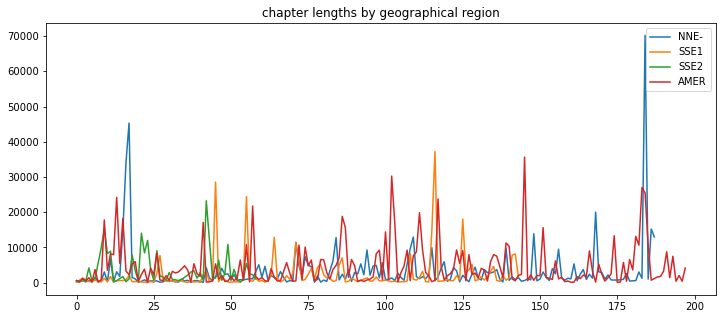

In [5]:
print(chapters_words_df)
# simple plotting of chapter lengths to get a sense of the variability
for geog in geogs:
    plt.plot([len(hakluyt_cat_geog.words(fileid)) for fileid in hakluyt_cat_geog.fileids(categories = geog)], label = geog)
plt.legend()
plt.title('chapter lengths by geographical region')
plt.show()

The *Navigations* come to about 2,000,000 words--about ten times the length of *Moby Dick*, for perspective. As addressed in text cleaning, about 120 documents consist of a foreign text followed by an English translation, so the informative wordcount is a little lower.

In [6]:
hakluyt_EN = PlaintextCorpusReader('text-data/ARG_EN', '.*')
print(f'The total wordcount of {len(hakluyt.words())} goes down to {len(hakluyt_EN.words())} in the English-only corpus, making for a {len(hakluyt.words()) - len(hakluyt_EN.words())}-word difference')

The total wordcount of 2069711 goes down to 1929358 in the English-only corpus, making for a 140353-word difference


Translated text only constitutes about 7% of the total wordcount and does not significantly affect the numerical outline.

Apart from the two main outliers of ~70,000 and ~ 45,000 words (both involving translation from Latin and hence only about half that wordcount in actual content), we get a solid variation from ~20-30,000 words down to little more than zero, coming down to an average chapter length of 3,500 words and an even shorter 1340-word median chapter. Many of the reports Hakluyt finds fit for publishing are only a handful of pages long, though he does not shy away from longer accounts either.

The American volume clearly stands out, accounting for nearly half the word volume--44%, to be precise; it also has the most chapters and the longest chapters on average. The intense focus on America comes despite the fact that the English have barely started engaging with the new continent, and Europeans overall have just about one century of well-documented American encounters, as opposed to thousands of years for Europe, Asia and Africa (Africa outside the Mediterranean and South Asia seem particularly neglected, though summing SSE1 & SSE2, as they are printed in a combined volume, yields an only slightly shorter wordcount than NNE). Tabulating basic wordcounts on a dataset of scholarly literature about Hakluyt on [Constellate](https://constellate.org/), I found what seemed an undue emphasis on America, but the counts here suggest that the scholarly focus is in this case largely aligned with Hakluyt's own predilections: seeing a potential for English imperial expansion on the Spanish model, Hakluyt is mainly interested in America; in some ways, the other volumes may be read as primarily establishing a history of English travel, trade and prowess, while America is where he wants to direct present and future efforts.

## Chronological focus

If America gets well above its fair share of attention in terms of geography, the chronological picture is far more strongly skewed in favor of the most recent (that is, 16th) century. A histogram captures the skew most clearly; a plotting of dates over chapter progression gives a more granular view:

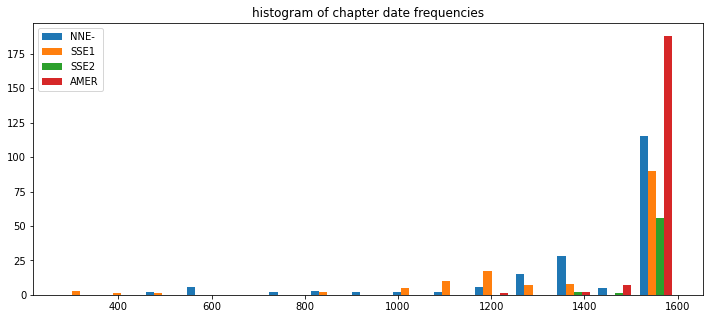

In [7]:
store={}
for geog in geogs:
    store[geog] = [HK_date(fileid) for fileid in hakluyt_cat_geog.fileids(categories = geog)]
plt.hist([store[geog] for geog in geogs], bins=15, label = geogs)
plt.legend()
plt.title('histogram of chapter date frequencies')
plt.show()

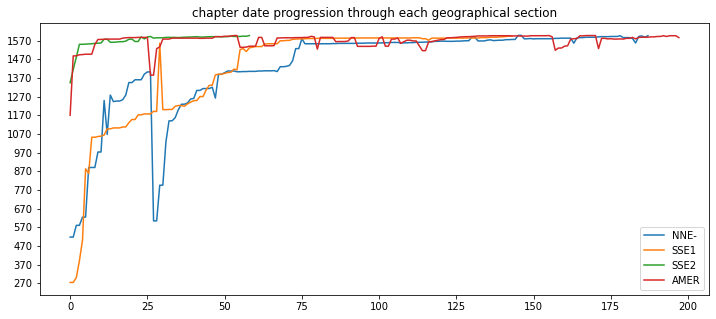

In [8]:
for geog in geogs:
    plt.plot([HK_date(fileid) for fileid in hakluyt_cat_geog.fileids(categories = geog)], label = geog)
plt.legend()
plt.yticks(range(270, 1600, 100))
plt.title('chapter date progression through each geographical section')
plt.show()

The compilation is heavily skewed in favor of the most recent century. While this is true across the board, however, there are differences in detail. Both the very short section on extra-Mediterranean Africa & South Asia and the extended American section only briefly touch on past centuries before jumping up to more recent times. That is particularly expected in the American case, as Europe had little in the way of recorded encounters there prior to the late 15th century "discovery"--the one 1170 entry, Madoc's voyage, is decidedly mythical. North Europe & Russia, as well as the Mediterranean region, on the other hand, do have long historical tails, though these are still minor relative to the 16th century entries. Curiously, all but the extra-Mediterranean sections show a notable deviation about the 26th chapter in each, suggesting a bit of a narrative departure, though this seems much more a matter of coincidence rather than design. For NNE, where the dip is most dramatic, it reflects a switch from travel narratives as such to accompanying documents, SSE1, the single chapter that jumps forward in time relates a contemporary note addressing the older period, and in AMER, the two documents that create the visible dip (neither going very far back) simply switch to a different topic with an earlier starting point.

# Surface Characterization of Hakluyt's Exploration Discourse

## Word Frequencies
An elementary way to get a sense of what Hakluyt writes about is through a simple tabulation of high-frequency words.

It is worth pausing to reflect on just what word frequencies do and do not mean. Fundamentally, we merely get a count of all the appearances of a given word. Using a lemmatized version of the corpus will help consolidate closely related words, such as "go" and "went," but it will not account for synonyms, so "run" and "walk quickly" will be treated as separate entries (in fact, "walk quickly" will be separated into two distinct entries). Still, given a large enough corpus, if we are interested in running, we can query our best guess or several guesses for the most common designation of our topic of interest. If "run" does come up a lot, that is a fairly solid indication that it's important for the text, if it doesn't, we may be better off looking elsewhere. Now, "a lot" is a vague notion--and it doesn't get much better than that. The specific number of appearances--say, 758 or 7,000--will indicate different things depending on the size of the corpus, but even if we normalize for the total wordcount, what does it really signify that "run" constitutes 0.0006 of the corpus? Similarly, there's no straightforward interpretation available for "56th-" or "257th most common word in the corpus." That said, the 56th most common word is likely substantially more important than the 257th, and similar relative comparisons can be made with regard to raw word counts, normalized frequencies, or any other numerical metrics. Between the methodological problems introduced by synonyms (and more complex syntactical structures that may similarly constitute a relevant instance through different means than the word token we search for) and the difficulty of interpreting numerical quantities, word frequencies are best used for tentative initial impressions and relative comparisons.

This is a great deal of reservations to be voiced before bringing forward the first results--but methodological self-awareness is especially crucial with computational results, and will be even more so when dealing with more complex algorithms than word counts. 

A more technical first step prior to bringing in the wordcounts is stopword removal: it is not typically helpful to know that "the" or "and" are used a lot in a given text, and words like these will populate the top frequent spot in most English texts (stopword removal further solidifies the point about word frequencies being far more helpful as relative comparisons than as concrete numerical facts). Given the nature of Hakluyt's English, the stopword list needs some close attention to do its job properly--but that is just a matter of listing the top 50-100 frequent words and adding the non-informative ones to the stoplist until I am happy with the results. Since I am particularly interested in violence, I will create a list of violence indicator words here as well to automatically highlight them in my results.

### Stopword & Violence Flag lists creation

In [9]:
import string
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import ngrams

eliz_stopwords = ["art", "doth", "dost", "'ere", "hast", "hath", "hence", "hither", "nigh", "oft", "should'st", "thither", "thee", "thou", "thine", "thy", "'tis", "'twas", "wast", "whence", "wherefore", "whereto", "withal", "would'st", "ye", "yon", "yonder"]
#based on https://github.com/BryanBumgardner/gutenburg_nlp/blob/master/stopwords_elizabethan
hk_stopwords = ['', 'unto','u','upon','de','also','wee','may','would','shall','hee','like','doe','could','much','every','againe','bee','might','without','well','within','yet','bene','ad','another','whereof','thereof','onely','next','himselfe','thus','untill','therefore','cum','selfe','non','ut', 'whole','little','full','neither','among','last','c','never','la','qui','ii','according','whose','either','per','along','item','al','likewise','mee','whereupon','till','able','self','el','que','mine','quae','sunt','et','although','litle','si','notwithstanding','besides','etiam','e','even','vel','alwayes', 'ever','rather','whether','still','otherwise','amongst', 'somewhat','ex','aforesaid','though','whatsoever','quam', 'ten','whereby','foorth','no', 'n','los','almost','howbeit','j', 'greatly','ac','yce', 'pro','en','ab','greatest','whereas','hoc','w','beene','doeth','eorum','con','withall','hereafter','moreover','nec','noone','omnes','del','enim','often']
#assembled by printing the most common tokens in a lemmatized corpus as shown immediately below
latin_stopwords = ['ab', 'ac', 'ad', 'adhuc', 'aliqui', 'aliquis', 'an', 'ante', 'apud', 'at', 'atque', 'aut', 'autem', 'cum', 'cur', 'de', 'deinde', 'dum', 'ego', 'enim', 'ergo', 'es', 'est', 'et', 'etiam', 'etsi', 'ex', 'fio', 'haud', 'hic', 'iam', 'idem', 'igitur', 'ille', 'in', 'infra', 'inter', 'interim', 'ipse', 'is', 'ita', 'magis', 'modo', 'mox', 'nam', 'ne', 'nec', 'necque', 'neque', 'nisi', 'non', 'nos', 'o', 'ob', 'per', 'possum', 'post', 'pro', 'quae', 'quam', 'quare', 'qui', 'quia', 'quicumque', 'quidem', 'quilibet', 'quis', 'quisnam', 'quisquam', 'quisque', 'quisquis', 'quo', 'quoniam', 'sed', 'si', 'sic', 'sive', 'sub', 'sui', 'sum', 'super', 'suus', 'tam', 'tamen', 'trans', 'tu', 'tum', 'ubi', 'uel', 'uero']
#different stopword subsets created to enable selectively un-stopwording certain language areas, for example to see if pronouns are skewed in an interesting way
pronouns = ['i', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'me', 'you', 'him', 'her', 'it', 'you', 'us', 'them', 'my', 'your', 'his', 'her', 'its', 'our', 'your', 'their', 'mine', 'yours', 'his', 'hers', 'its', 'ours', 'yours', 'theirs', 'myself', 'yourself', 'himself', 'herself', 'itself', 'ourselves', 'yourselves', 'themselves']
modals = ['shall','shal','shalt','should', 'can', "can't", 'cannot', 'could', 'will','wil', 'would', 'may', 'must', 'might', 'ought', 'need', 'have', 'has']
directives = ['without', 'within', 'there', 'thence','away','est','towards','toward','farre','betweene','wherein','therein']
numbers = ['least','lesse','none','halfe','one','two','second', 'three','iii','third','foure','four','five','sixe', 'six','seven','eight','nine','twelve', 'twenty','hundred','thousand','many','large','greater']
punctuation = [i for i in string.punctuation] + ['•']
stop_words_min = list(set(punctuation + stopwords.words('english') + latin_stopwords + eliz_stopwords + hk_stopwords) - set(pronouns + modals + directives))
stop_words_max = stop_words_min + pronouns + modals + directives + numbers
stop_words_max_p = stop_words_max + ['great', 'make', 'good', 'part', 'certain', 'thing', 'wherewith', 'afterward', 'day']

viol_flags = ['violence', 'harm', 'injury', 'injure', 'hurt', 'damage', 'scathe', 'wound', 'maim', 'cripple', 'mutilate', 'cut', 'mangle', 'torture', 'torment', 'wound', 'gash', 'bruise', 
              'bloody', 'bloodshed', 'bloodshedder', 'bloodshedding', 'blood', 'hit', 'strike', 'beat', 'revenge', 'subdue', 'vanquish', 'rob', 'robbery', 'assail', 'assailant',   
              'fight', 'scrap', 'struggle', 'conflict', 'melee', 'brawl', 'combat', 'wrestle', 'wrestler',
              'kill', 'death', 'slay', 'murder', 'assassinate', 'assassin', 'massacre', 'slaughter', 'butcher', 'slaughter', 'manslaughter', 
              'battle', 'war', 'siege', 'attack', 'assault', 'skirmish', 'skirmisher', 'enemy', 'foe', 'hostile', 'army', 'soldier', 'warrior', 'conquer', 'conqueror', 'conquest', 'invade', 'invasion', 'invaded', 'rebel', 'mutiny',
              'detain', 'capture', 'captive', 'imprison', 'imprisonment', 'gaol', 'prisoner', 'prison', 'slave', 'enslave', 'punish', 'victory', 'resist', 'resitance', 'surprise', 'mutiny', 'mutinous',
              'shoot', 'shot',  'blast', 'burn', 'fire', 'blaze',
              'cruel', 'cruelty', 'destroy', 
              'weapon','arrow', 'crossbow', 'dart', 'javelin', 'mace', 'club', 'sword', 'lance', 'spear', 'rapier', 'pike', 'target', 'buckler', 'falchion', 'halberd', 'partisan', 'dagger',
              'musket', 'gun', 'gunner', 'bullet', 'caliver', 'culverin', 'harquebus', 'harquebusier', 'harquebuss', 'saker', 'cannon', 'artillery', 'munition', 'gunpowder', 'handgun', 'volley', 'canon']
viol_poss = ['ordinance','armour', 'fortress', 'fort', 'defence', 'bulwark', 'die', 'pain', 'piece', 'discharge', 'charge', 'powder', 'spoil', 'abuse', 'steal', 'knife', 'hatchet', 'poison', 'fire', 'bow', 'force', 'pain', 'sink', 'hang', 'blow', 'breach', 'warlike', 'execute', 'execution'] 

In [10]:
hakluyt_lem_unfiltered = PlaintextCorpusReader('text-data/ARG_EN_lem', '.*')
hakluyt_lem_unfiltered_col = nltk.TextCollection(hakluyt_lem_unfiltered)
hakluyt_lem_unfiltered_fd = nltk.FreqDist(word for word in hakluyt_lem_unfiltered.words() if word.isalpha())

In [11]:
#by running the print command below, I gradually built up the different stop word variables above until I was satisfied with the results
print([t for t, _ in hakluyt_lem_unfiltered_fd.most_common(300) if t not in stop_words_max])

['great', 'come', 'man', 'say', 'ship', 'day', 'make', 'go', 'take', 'good', 'place', 'time', 'call', 'land', 'king', 'see', 'country', 'find', 'sea', 'part', 'river', 'give', 'send', 'league', 'certain', 'thing', 'captain', 'year', 'island', 'town', 'hand', 'bring', 'water', 'people', 'sail', 'company', 'set', 'first', 'city', 'pass', 'wind', 'return', 'master', 'lie', 'side', 'night', 'way', 'know', 'small', 'think', 'coast', 'lord', 'merchant', 'cause', 'shore', 'present', 'depart', 'God', 'boat', 'long', 'name', 'mean', 'England', 'use', 'leave', 'house', 'general', 'voyage', 'stand', 'majesty', 'north', 'near', 'keep', 'put', 'cape', 'far', 'John', 'diverse', 'letter', 'end', 'english', 'carry', 'west', 'fall', 'saint', 'degree', 'rest', 'manner', 'Spaniard', 'east', 'high', 'course', 'emperor', 'gold', 'anchor', 'south', 'write', 'follow', 'sort', 'show', 'number', 'together', 'begin', 'half', 'store', 'Portugal', 'enter', 'reason', 'order', 'receive', 'month', 'subject', 'run', 

#### Violence Flags
I found no good pre-assembled violence flag lists, so I started with the obvious: shoot, kill, injure. In principle, the NLTK .similar() method--"find other words which appear in the same contexts as the specified word"--seemed like it would allow me to build up on that, but it did not. The concordance method, instead, proved to bring up a great deal of violence indicators based on the starting points. Clearly, violence-related words tend to appear in clusters: "they shoot strong , wound and kill both horse and man"; weapons especially often show up in lists ("fight constant and valiant with javelin , mace , battle - ax , and sword . but special they be excellent archer , and cunning warrior"). This is a somewhat laborious process--and throughout the project, I kept coming back and expanding the list. Though a flag list does not encompass much nuance (the viol_poss list attempts to capture some of the most obvious cases of words that often, but not always indicate violence), it is a helpful tool.

In [12]:
hakluyt_lem_unfiltered_col.similar('kill', 30)
hakluyt_lem_unfiltered_col.concordance('kill', 150)
#hakluyt_lem_unfiltered_col.concordance('sword', 150)

have be take make see do find that and bring send go leave give in
come for all carry use keep say know with but pass they as get receive
Displaying 25 of 346 matches:
 d . c . 890 . himself be one of the six , which in the space of 3 . day kill threescore . he be a man of exceed wealth in such riches , wherein the w
they ride not with spur . also , to touch arrow with a whip , to take or kill young bird , to strike a horse with you rain of their bridle , and to br
t be lay hold on and take , for be on foot they shoot strong , wound and kill both horse and man . * Johannes de of the journey of friar * John unto t
ff : for if they see a man clothe in red , they run upon he immediate to kill he . next unto they be the people of tebet , man which be wont to eat th
place , or alongst the coast for a large quantity of fish , dry or wet , kill by the natural , or to be take by our man at a price reasonable for truc
t one man that dwell at Pechora , who seem to be the chief among they in kill

### Basic Top Frequent hits

In [13]:
# new NLTK objects filtered for relevant stop words
hakluyt_lem = PlaintextCorpusReader('text-data/ARG_EN_lem', '.*')
hakluyt_lem_col = nltk.TextCollection(hakluyt_lem)
hakluyt_lem_fd = nltk.FreqDist(word for word in hakluyt_lem.words() if word not in stop_words_min)
#simple function to bring out violence-related words
def bar_viol(x):
    return '|||'+x+'|||' if x in viol_flags + viol_poss else x 

print([bar_viol(t) for t, _ in hakluyt_lem_fd.most_common(300) if t not in stop_words_min])

['they', 'we', 'have', 'he', 'our', 'their', 'i', 'it', 'his', 'great', 'there', 'come', 'man', 'say', 'shall', 'ship', 'day', 'will', 'make', 'one', 'go', 'may', 'you', 'take', 'good', 'two', 'place', 'time', 'call', 'land', 'king', 'see', 'can', 'country', 'many', 'find', 'my', 'sea', 'part', 'river', 'give', 'your', 'send', 'league', 'certain', 'thing', 'three', 'captain', 'year', 'island', 'town', 'hand', 'bring', 'water', 'people', 'sail', 'company', 'set', 'first', 'city', 'pass', 'wind', 'without', 'return', 'master', 'lie', 'within', 'side', 'night', 'way', 'know', 'four', 'towards', 'small', 'think', 'coast', 'lord', 'merchant', 'cause', 'shore', 'present', 'depart', 'God', 'boat', 'themselves', 'long', 'name', 'mean', 'England', 'use', 'leave', 'she', 'house', 'general', 'voyage', 'her', 'stand', 'majesty', 'north', 'near', 'keep', 'put', 'cape', 'five', 'far', 'John', 'diverse', 'letter', 'end', 'english', 'carry', 'west', 'fall', 'saint', 'degree', 'rest', 'hundred', 'himse

Though a list of disparate words is limited in many ways, it does broadly indicate important features of the text in question. A lot of pronouns show up, starting with "they" and "we": the narratives regularly depict encounters between distinct groups of people. "He" isn't far behind--but "she" shows up far later; there were few women on European ships, and non-European women were clearly far from the center of the explorers' attention. There are many active verbs ("come", "go", "find"), and many indicators of sea-faring exploration ("ship", "country", "coast", "sail"). "England", "english", "Spaniard", "Portugal", "Indians" serve as an abbreviated *Dramatis personae*, underlining Hakluyt's overwhelming interest in America: it would take a longer list to capture, for example, Russians and Turks.

Since I want to pursue the issue of violence, I've put a (crude) visual highlight on known indicators; though not quite at the top of the most frequent tokens list, these indicators do show up soon enough.

#### A First Glance at "Take"

Top frequent word lists are best for straightforward word tokens: a ship is a ship, it will rarely show up outside of a marine travel context; "shoot" or "kill" reliably indicate physical violence. More nuanced or ambiguous keywords shift their meaning depending on context, and their high (or low) incidence means little as an isolated fact. One such key word that will recur throughout this study is "take." It is very high up the top frequent word lists, and though it can seem innocuous in itself, it cues in a great deal of violence:

In [14]:
hakluyt_lem_col.concordance('take', 150)

Displaying 25 of 4369 matches:
ny concern king Arthur and t1 - ' • ] his conquest of the north region , take out of the history of the king of Britain , write by Galfridus Monumeten
ony of the right and appendance of the crown of the kingdom of Britain , take out of m . Lambard his and pKatovotda , folio 137 . page . 2 . 5 A . D .
r ever , faith in Christ only . at that time all the noble man of Norway take wife of the noble nation of the Britain , whereupon the norse say , that
ncorporate with we by the receive of our religion and sacrament , and by take wife of our nation , and by affinity , and marriage . for so the good ki
er there be any habitation of man north beyond the desert . whereupon he take his voyage direct north along the coast , have upon his steereboord alwa
terling , but of mead there be plenty . . the navigation of king Edgar , take out of Florentius Wigorniensis , Hoveden , and m . Dee his discourse of 
un , and Clito Edgar . A . D . IO66 . . a chronicle of the king

Back-translating from the lemmatized form, we first get two documents "taken out" of their respective sources, about as unexciting as it gets. "Taking wives" is a discomfiting turn of phrase, but probably not indicating undue coercion. Soon enough, however, we get to "taking the wealth of the country" and "taking possession" of lands, straight at the core of colonial violence. The taking of people will recur time and again as staple colonial practice--for hostage negotiations, for use as interpreters, for forced labor and slavery, and as a side consequence of armed conflict, including between Europeans. The reference to the "gelding" (castration) and blinding of the "taken" Harald in the printout above is a helpful reminder of the brute violence that is flattened out by the near-euphemism of "take." The taking of cities--here, the Crusader conquest of Antioch--was again a brutal business often extending into a massacre of the conquered.

#### Comparison against Contemporary Histories

Word frequencies can usefully be compared between corpuses, and it may be more informative to find that "take" or "they" occurs more frequently in Hakluyt than on average in English than simply to observe the number of appearances. Average English, of course, is an elusive construct, especially for older historical periods. Instead, I've compiled a number of English histories, not aspiring to broad representativeness but rather hoping that the contrast would bring out what is unique about English dealings abroad as opposed to political discourse closer to home. The 1568 *A Chronicle at Large* by Richard Grafton, the 1602 *Survey of Cornwall* by Richard Carew, and the 1643 *A Chronicle of the Kings of England* by Richard Baker bring a sizeable ~1.5m word chunk of text into the comparison.
Pandas dataframe works nicely with Jupyter for displaying the comparison with simple visual highlights for numerical discrepancies (gradations of yellow) and violence keywords (bolded red text)--those, unfortunately, do not show up on the GitHub rendition of the notebook.

In [15]:
# MorphAdorner lemmatization of comparison texts
#   MorphAdorner commands:
#   cd C:\Users\apovzner\Documents\morphadorner-2.0.1
#   adornplainemetext C:\Users\apovzner\Documents\Hakluyt\text-data\morphadorner-outputs\comparison_texts_adorned C:\Users\apovzner\Documents\Hakluyt\text-data\C:\Users\apovzner\Documents\Hakluyt\text-data\comparison_texts\*.txt
#adorned_Extract commanded out to avoid error due to already existing lemmatized output
#adorned_extract('text-data/morphadorner-outputs/comparison_texts_adorned', 'text-data/comparison_texts/lemd', 'lem')

In [16]:
# top frequent words in HK vs comparison corpus
# setting up comparison text corpus
comparison = PlaintextCorpusReader('text-data/comparison_texts/lemd', '.*')
comparison_filtered = [t.lower() for t in comparison.words() if t not in stop_words_min]
comparison_fd = nltk.FreqDist(comparison_filtered)

In [17]:
def compare_freqs(standard, comp):
    '''
    takes in 2 frequent words counts (outputs of FreqDist.most_common(x))
    and returns the second count with an indicator of
    how many spaces the token moved up/down in the list 
    (or 'new' if the token has not appeared on the original list)
    arguments:
    - standard: the 'source' count
    - comp: the 'new' count, to be compared to the 'source'
    returns: 'comp' count plus change indicator
    '''
    ret = comp
    for i in range(len(standard)):
        s_token = standard[i][0]
        for j in range(len(comp)):
            if comp[j][0] == s_token:
                change = i-j
                change = '+' + str(change) if change > 0 else str(change)
                ret[j] = (comp[j][0], comp[j][1], change)
    for k in range(len(ret)):
        if len(ret[k]) == 2:
            ret[k] = (ret[k][0], ret[k][1], 'new')
    return(ret)

In [18]:
def highlight_shifts(x):
    return ["" if len(token) < 3 else "background: orange" if (token[2] == 'new' or abs(int(token[2])) > 100) 
            else "background: #FFDD3C" if abs(int(token[2])) > 50
            else "background: #FFEA61" if abs(int(token[2])) > 30
            else "background: #FFF192" if abs(int(token[2])) > 20
            else "background: #fdff99" if abs(int(token[2])) > 10
            else "background: #FFFFB7" if abs(int(token[2])) > 5
            else "" for token in x]
def red_viol(x):
    return ['color: red' if token[0] in viol_flags else "" for token in x]
def bold_viol(x):
    return ["font-weight: bold" if token[0] in viol_flags else "" for token in x]
def redbold_viol(x):
    return ['color: red; font-weight: bold' if token[0] in viol_flags else "" for token in x]

In [19]:
wordfreqs_comp = pd.DataFrame()
wordfreqs_comp['comp'] = comparison_fd.most_common(250)
wordfreqs_comp['Hakluyt'] = compare_freqs(comparison_fd.most_common(250), hakluyt_lem_fd.most_common(250))

In [20]:
wordfreqs_comp.T.style.apply(redbold_viol).apply(highlight_shifts)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
comp,"('he', 29710)","('his', 22525)","('king', 18301)","('they', 15346)","('have', 13556)","('it', 7593)","('their', 7456)","('man', 6277)","('great', 6228)","('say', 6028)","('lord', 6023)","('make', 5328)","('come', 5175)","('shall', 5093)","('there', 4924)","('will', 4816)","('take', 4661)","('earl', 4578)","('duke', 4530)","('sir', 4426)","('time', 4379)","('year', 4002)","('i', 3891)","('day', 3506)","('england', 3443)","('you', 3434)","('she', 3433)","('one', 3039)","('may', 2840)","('send', 2818)","('john', 2701)","('french', 2674)","('town', 2659)","('her', 2627)","('call', 2586)","('many', 2488)","('queen', 2466)","('son', 2387)","('two', 2323)","('page', 2299)","('give', 2292)","('henry', 2215)","('first', 2213)","('we', 2200)","('good', 2185)","('realm', 2056)","('cause', 2044)","('can', 2010)","('land', 1990)","('go', 1974)","('france', 1948)","('part', 1871)","('prince', 1869)","('place', 1840)","('edward', 1839)","('himself', 1790)","('three', 1763)","('bishop', 1739)","('london', 1733)","('set', 1720)","('thing', 1674)","('english', 1670)","('bring', 1660)","('our', 1645)","('see', 1614)","('keep', 1586)","('people', 1556)","('my', 1547)","('name', 1542)","('city', 1540)","('long', 1504)","('without', 1497)","('diverse', 1493)","('castle', 1442)","('war', 1432)","('mean', 1424)","('thomas', 1414)","('country', 1399)","('saint', 1382)","('god', 1361)","('think', 1347)","('return', 1347)","('your', 1339)","('scot', 1331)","('four', 1327)","('hundred', 1310)","('know', 1303)","('army', 1285)","('thousand', 1276)","('pass', 1272)","('hear', 1270)","('put', 1236)","('reign', 1231)","('person', 1231)","('lie', 1230)","('knight', 1227)","('death', 1212)","('leave', 1200)","('begin', 1188)","('counsel', 1183)","('richard', 1166)","('slay', 1155)","('follow', 1154)","('william', 1136)","('brother', 1120)","('house', 1118)","('hand', 1112)","('die', 1110)","('certain', 1086)","('noble', 1083)","('battle', 1080)","('find', 1077)","('answer', 1061)","('end', 1055)","('write', 1049)","('march', 1036)","('bear', 1022)","('number', 1010)","('father', 1010)","('within', 1008)","('enemy', 973)","('lady', 970)","('show', 967)","('receive', 966)","('daughter', 966)","('church', 963)","('new', 960)","('depart', 959)","('present', 947)","('high', 935)","('crown', 932)","('life', 923)","('parliament', 913)","('ship', 909)","('way', 906)","('••', 900)","('five', 898)","('enter', 896)","('wife', 896)","('themselves', 896)","('sea', 894)","('peace', 891)","('word', 872)","('matter', 870)","('hold', 860)","('¶', 852)","('short', 848)","('manner', 846)","('robert', 835)","('law', 828)","('order', 816)","('arm', 808)","('scotland', 804)","('marry', 804)","('right', 801)","('york', 798)","('love', 796)","('28', 792)","('archbishop', 786)","('common', 784)","('company', 782)","('captain', 775)","('six', 768)","('honour', 764)","('power', 757)","('master', 754)","('emperor', 752)","('side', 750)","('fall', 750)","('fight', 744)","('friend', 737)","('deliver', 727)","('stand', 725)","('together', 722)","('use', 721)","('desire', 717)","('promise', 716)","('nothing', 71

The most dramatic shifts, highlighted orange, point toward sea travel, which indeed is far more frequent in travel narratives compared to a more inward-looking English perspective of the histories. Later down the line we similarly see the emergence of vocabulary related to trade--"merchant," "gold," "commodity," and "trade"--all marked as "new," meaning that neither of those had made it to the top 250 frequent words of the histories corpus.

The pronoun shuffling is interesting: the prominence of 'he' and 'his' in the histories clearly reflects a focus on singular (and male) individuals, most often, apparently, being kings, though earls and dukes appear soon, too. Travel narratives are far more likely to speak in first-person plural, reflected in the 40- and 60-place jumps in 'we' and 'our'; the voyages are essentially group endeavors that are harder to subsume under a singular leader. The first person's lag in the histories likely also reflects the chroniclers' predilection for third-person narration, while travel narratives often speak directly in the first person.

Notably, violence comes up much sooner in the histories compared to the travel narratives--with about a 100-place gap. I can, of course, shrug that off by simply reminding that historians in the old traditions (and still all too often today) tend to view history as a series of "great men's" doings with an especial emphasis on wars and violent dealings. It is worth, however, jumping forward to the main argument of this investigation (which I will establish further below). Within Hakluyt's text, we will see that overt references to violence are disproportionately attached to conflict between different European parties, while colonial violence often passes unnoticed or unremarked. In a similar vein, the greater prominence of violent keywords in English histories compared to Hakluyt's travel narratives may reflect a broader propensity to register violence between European parties at a higher rate compared to cases where non-European bodies and lives are at stake. The underlying implication, again, is that violations of white lives matter more than those of dark-skinned persons; white lives matter in ways that black ones don't, to put it in present-day parlance.

#### Subsection Breakdown & Discursive Consistency
Comparing the different geographical regions, and even contrasting the narrative sections with the supporting documentation (according to the classification provided in *The Hakluyt Handbook* vol II, Ed. D. B. Quinn, 1974) reveals a surprising degree of discursive continuity: the overall frequency rankings do not differ by much.

In [21]:
#creating a lemmatized geographically categorized corpus based on the category map from the less-processed corpus above in chapter/word lengths section
hakluyt_lem_cat_geog = CategorizedPlaintextCorpusReader('text-data/ARG_EN_lem', '.*', cat_map = fileid_geog)

# setting up categorized corpus based on both the nar/doc and the extended tags
# reminder that nar vs doc is a neat exclusive division of the corpus into two bins, while the other tags both overlap and skip
filelist = os.listdir('text-data/ARG_EN_lem')
fileid_tags = {}
for file in filelist:
    fileid_tags[file] = HK_tags(file)
#from nltk.corpus import CategorizedPlaintextCorpusReader
hakluyt_lem_cat_tags = CategorizedPlaintextCorpusReader('text-data/ARG_EN_lem', '.*', cat_map = fileid_tags)

# top frequent words in HK global vs split by geography
hakluyt_lem_filtered = [t for t in hakluyt_lem.words() if t not in stop_words_min]
hakluyt_lem_cat_geog_fd = nltk.ConditionalFreqDist(
                                (geog, word)
                                for geog in geogs
                                for word in hakluyt_lem_cat_geog.words(categories = geog)
                                if word not in stop_words_min)

# top frequent words in HK global vs split by narrative / document
hakluyt_lem_cat_nardoc_fd = nltk.ConditionalFreqDist(
                                (tag, word)
                                for tag in ['nar', 'doc']
                                for word in hakluyt_lem_cat_tags.words(categories = tag)
                                if word not in stop_words_min)

wordfreqs_partitioned = pd.DataFrame()
wordfreqs_partitioned['total'] = hakluyt_lem_fd.most_common(500)
for geog in geogs:
    wordfreqs_partitioned[geog] = compare_freqs(hakluyt_lem_fd.most_common(500), hakluyt_lem_cat_geog_fd[geog].most_common(500))
for tag in ['nar', 'doc']:
    wordfreqs_partitioned[tag] = compare_freqs(hakluyt_lem_fd.most_common(500), hakluyt_lem_cat_nardoc_fd[tag].most_common(500))
    
wordfreqs_partitioned.T.style.apply(highlight_shifts).apply(redbold_viol)

There are few dramatic shifts in the top frequent words to be noted, and many of the largest--"Portugal," "Turk," "Spaniard," "Russia"--transparently reflect local focus. Travels to northern Europe and Russia as well as documentary sections are a little heavier on formal diplomatic language (positive shifts in "emperor," "majesty," "letter," "subject") as well as direct second-person address ("you", "your"), while travels in the Mediterranean indicate more developed trading relations ("merchant," "hundred," "thousand," "money," "custom," "pay," "trade," "merchandise," "cloth"). Still, overall the underlying vocabulary of us-they interaction, sea-faring travel, and trade stays in place. Though Hakluyt is borrowing from many different writers, it seems that the basic vocabulary, which roughly approximates the main subject matter as well as some narrative conventions, are fairly constant across the board.

## Topic Models
Word frequencies are most obviously limited in their blindness to context and to syntactic complexity: "white" means different things depending on whether "man" or "wool" follows after--and even more so if preceded by "not." Topic models are good ways to capture context, though syntax still falls outside their purview. Still, at a large enough scale, we can reasonably expect that "white" indicates whiteness much more often than its negation or unrelated circumlocutions such as "white lies" (if we have reason to be concerned about particular phrases, we can transform them into separate tokens, but I found no need to do that for my purposes).

The actual algorithmic steps taken in topic modeling are a little hard to follow (see an [accessible narrative explanation by Matthew L. Jockers](https://www.matthewjockers.net/macroanalysisbook/lda/) or [a more technical one by Ted Underwood](https://tedunderwood.com/2012/04/07/topic-modeling-made-just-simple-enough/)). The inputs and outputs, however, are quite intuitive: we provide a body of text documents and the desired number of topics, and we get a sequence of lists of words, each of which is a group of words that often appear together in the same document. It is worth emphasizing that associations between words are based solely on co-incidence in the same documents--the algorithm altogether disregards word order, and two words appearing in the same sentence are treated the same as if appearing within 10 pages of each other, as long as it is in the same document. Although this sounds like--and is--a rather simplistic approximation of an intuitive "topic" of coherent meaning, the topics assembled in topic modeling typically prove both easy to interpret and reflective of the content at hand.

### MALLET
[MAchine Learning for LanguagE Toolkit](https://mimno.github.io/Mallet/index) is an implementation of topic modeling (and additional tools) popular among Humanities researchers; it runs from the command line and is fairly simple to operate with minimum background knowledge. Between a personal dislike of the command line and a fondness for maximally descriptive filenames, I've automated the command generation through simple Python prints, which I would then copy and paste into the command line. 

#### Topic Model Generation & Outputs

In [22]:
# stop word file generation: MALLET has a default English stopword list, which probably would have served me just fine.
# I've added Latin and Spanish stop words as I had not created an English-only corpus until rather late in the project
# commented out to avoid file ovrewriting errors
# stop_words_all = stop_words_max + stopwords.words('spanish')
# with open(r'mallet/stop_words_all.txt', 'w') as f:
#     f.write('\n'.join(stop_words_all))

In [23]:
# set MALLET installation directory, text corpus directory and desired output directory
mal_install = r'C:\Users\apovzner\Documents\mallet-2.0.8'
mal_texts = r'C:\Users\apovzner\Documents\Hakluyt\text-data'
mal_out = r'C:\Users\apovzner\Documents\Hakluyt\mallet'

In [24]:
# initialize working directory at start of MALLET working session
print('cd ' + mal_install)

cd C:\Users\apovzner\Documents\mallet-2.0.8


In [25]:
# MALLET corpus creation: adjust input directory depending on the corpus of interest
corpus = 'CC_ML_FR_trimmed_morphad_lem'
print(r'bin\mallet import-dir --input ' + mal_texts + '\\' + corpus + r' --output ' + mal_out + '\\' + corpus + '_sw_all.mallet' + ' --keep-sequence --stoplist-file ' + mal_out + r'\stop_words_all.txt')

bin\mallet import-dir --input C:\Users\apovzner\Documents\Hakluyt\text-data\CC_ML_FR_trimmed_morphad_lem --output C:\Users\apovzner\Documents\Hakluyt\mallet\CC_ML_FR_trimmed_morphad_lem_sw_all.mallet --keep-sequence --stoplist-file C:\Users\apovzner\Documents\Hakluyt\mallet\stop_words_all.txt


In [26]:
# MALLET topic model creation:
num_topics = 40 # optimal number depends on your corpus and what you want to get; experiment
num_iterations = 10000 # the more iterations, the more refined your results; subject to diminished results--5,000 works about just as well, and 1,000 could still pass
optimize_interval = 5 # optimization hyperparameters allow the algorithm to find some topics more prevalent than others in the corpus, which helps the results
optimize_burn_in = 10 # I found no detailed information on what the specific values mean
folder_path = mal_out +'\\'
corpus = 'CC_ML_FR_trimmed_morphad_lem'
extra = '_diag_'
output_name = corpus + '_sw_all_' + str(num_topics) + '_topics_' + str(num_iterations) + '_iter_' + str(optimize_interval) + '_' + str(optimize_burn_in) + '_optim' + extra

print(f'bin\mallet train-topics --input {folder_path}{corpus}_sw_all.mallet --num-topics {num_topics} --num-iterations {num_iterations} --optimize-interval {optimize_interval} --optimize-burn-in {optimize_burn_in} --output-state {folder_path}{output_name}.gz --output-doc-topics {folder_path}{output_name}_doctopics.txt --output-topic-keys {folder_path}{output_name}_topickeys.txt --diagnostics-file {folder_path}{output_name}_diagnostics.xml --xml-topic-phrase-report {folder_path}{output_name}_topicphrase.xml --num-top-words 50')

bin\mallet train-topics --input C:\Users\apovzner\Documents\Hakluyt\mallet\CC_ML_FR_trimmed_morphad_lem_sw_all.mallet --num-topics 40 --num-iterations 10000 --optimize-interval 5 --optimize-burn-in 10 --output-state C:\Users\apovzner\Documents\Hakluyt\mallet\CC_ML_FR_trimmed_morphad_lem_sw_all_40_topics_10000_iter_5_10_optim_diag_.gz --output-doc-topics C:\Users\apovzner\Documents\Hakluyt\mallet\CC_ML_FR_trimmed_morphad_lem_sw_all_40_topics_10000_iter_5_10_optim_diag__doctopics.txt --output-topic-keys C:\Users\apovzner\Documents\Hakluyt\mallet\CC_ML_FR_trimmed_morphad_lem_sw_all_40_topics_10000_iter_5_10_optim_diag__topickeys.txt --diagnostics-file C:\Users\apovzner\Documents\Hakluyt\mallet\CC_ML_FR_trimmed_morphad_lem_sw_all_40_topics_10000_iter_5_10_optim_diag__diagnostics.xml --xml-topic-phrase-report C:\Users\apovzner\Documents\Hakluyt\mallet\CC_ML_FR_trimmed_morphad_lem_sw_all_40_topics_10000_iter_5_10_optim_diag__topicphrase.xml --num-top-words 50


After creating a MALLET corpus, you can create different topic models depending on the parameters above. The diagnostics file and the topic-phrase report can be consulted for specific metrics on a given word--not necessary, but good to have just in case. The two files involved in routine operations are topic-keys and doc-topics. 

Topic-keys lists off the topics--again, each consisting of a list of words identified as often appearing together across documents; the default is 20 top words per topic; I set it to 50 with "--num-top-words 50" in the train-topics command, but it's worth remembering that words are listed in order of decreasing importance, so the longer tail is not as significant (the diagnostics file lists precise numbers). The first of the two numbers prefacing each list is simply an index, the second, according to [MALLET's website](https://mimno.github.io/Mallet/topics), is "the Dirichlet parameter," which, if hyperparameter optimization is on, is "roughly proportional to the overall portion of the collection assigned to a given topic," once rescaled to a total sum of 1.

The doc-topics file lists the topic composition of every document in the corpus, which allows for an easy identification of the documents most strongly associated with any given topic.

#### Topic Model Processing
Given several lists of lists, a spreadsheet or dataframe interface is called for. I used Excel, which allows me to see and think through the entire list of topic keys at once (as long as I am working with under ~50 topics) and to use the doc-topics list interactively for things such as glancing through the top document titles for a given topic and accessing the text files themselves.

Copying the topic-keys text file into the "keys" sheet, I insert a column header row, marking the index as "i," the Dirichlet parameter--as "par," and the topic word lists as "w." I also add a "%" row, which is simply "par" rescaled to 1 indicating the topic's relative weight in the corpus, and "t," where I manually mark provisional topic labels. See the result below, sorted by topic weight:

In [27]:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 1000)
pd.set_option('display.float_format',  '{:,.3f}'.format)

from IPython.display import HTML
x15_tot_keys = pd.read_excel(r'mallet/15.xlsx', sheet_name= 'keys')

In [28]:
x15_sorted = x15_tot_keys.sort_values(by=['%'], ascending=False)
HTML(x15_sorted.to_html(index=False))

i,par,%,t,w
2,0.540,0.272,expl_gen,great man good make time part mean god thing know think country cause king place give take return voyage send first bring present majesty find order see long write purpose matter better desire far lord sort use way receive england show charge end leave sir hand number honour keep mind
14,0.249,0.125,expl_action,great man make come say call see day people country certain thing place take river water hand house give time find stand long use side land part woman head bring fish stone eat wood tree manner fair diverse near ground four lie name drink set grow gold kind together store
5,0.238,0.120,sailing,ship come day man take captain sail boat night company shore master generali land aboard wind find set depart great place water town anchor fleet send make put four english admiral pinnace morning small voyage time john leave give hand good piece shoot portugal island bring see clock near lose
1,0.228,0.115,trade_pol,say merchant subject time lord grant john england letter good year dominion king ship master person realm william heir part foresay make company governor thomas english present certain give merchandise land trade traffic successor custom edward london place richard ambassador accord grace privilege name city take manner pay free cause
9,0.100,0.051,trade_E_indies,king great good city make portugal ship cloth merchant sell commodity come money pay year call voyage lade custom kingdom merchandise hand goa gold buy place four pound bring pegu small sort carry trade china india weight thing die half indies house ducat moor bark six silk aleppo colour fine
12,0.094,0.047,expl_descr,land part ice coast find degree island voyage discover north passage west sail discovery sun country region say cold year way first reason world america great heat course far navigation east pass prove pole equinoctial latitude experience south people call sound place cape know set english certain appear seem northwest
4,0.094,0.047,crusade&far-E_war,king year english man kingdom great lord duke city prince england call slay army christian earl land province henry father china war take richard time peace island brother come send emperor noble magistrate john jerusalem life reign day name namely japan book length battle navy journey french knight holy first
11,0.087,0.044,reg_S_AM_spanish_setl,indians spaniard river town come great call say league ship king send spain city country place take indian soldier coast land certain fort captain house mexico way find gold store man year silver discover carry people pass peru number mountain return build port small province victual make negro island good
6,0.086,0.043,sailing_tech,league land island cape wind day degree see west south fathom come lie north water east coast course isle bay shore river call point saint southwest anchor high northwest find side sail say hill latitude stand southeast rock run great low sight half good sand make certain sound part harbour
8,0.084,0.043,reg_rus_monr_trade,emperor send majesty russia say come letter country good merchant ware great moscow day ambassador english company king astracan queen city house year write duke take persia mile town call depart agent place prince sell tartar servant horse bring river ruff pass part time commodity buy highness castle russes nicholas


The topic spread serves as a more focused overview of the corpus than simple word frequencies. About half the topic weight is occupied with exploration in a transparently masculinist imperial key, hitting "great" and "man" at the top of the two heaviest topics, with emphasis on movement, action, discovery, and royal as well as divine sanction. A quick plotting of the sum of topics #2, #12 & #14 supports the earlier finding of discursive continuity: despite repeated dips in this "exploration" discourse, it shows substantial presence across most of the collection's chapters.

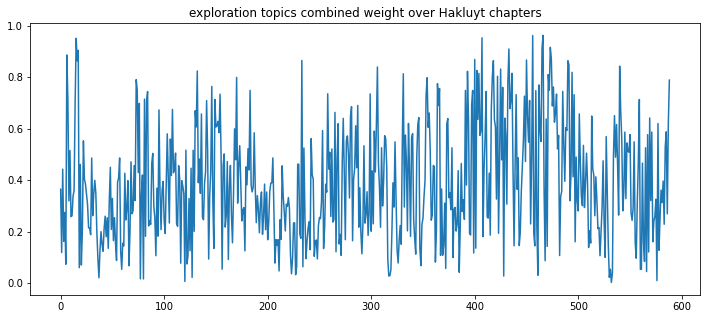

In [29]:
x15_tot_docs = pd.read_excel(r'mallet/15.xlsx', sheet_name= 'docs')
import matplotlib
import matplotlib.pyplot as plt 
plt.title('exploration topics combined weight over Hakluyt chapters') 
matplotlib.pyplot.plot(x15_tot_docs["expl_tot"])

Topics concerned with sailing identify the main mode of this imperial expansion, and several regional topics identify the main directions: Russia and the Ottoman territories in the east, and America in the west. Eastern voyages are strongly associated with Crusader history, which is lumped together with far-east voyages to China and Japan; similarly, America shows substantial Spanish presence. (Latin and Spanish topics indicate that this particular topic spread was computed before I cleaned out non-English text).

Computing a higher number of topics disaggregates the occasionally awkward lumping (such as Ottoman/Crusades with China/Japan), providing a much more granular overview, with a chance of identifying narrower topics of interest (even if it also introduces redundancy and frequent uninteresting topics such as lists of names and ranks). For example, in the 60-topic spread below, I can pull out several topics dealing with armed conflict, and several more that clearly address Native American encounters.

In [30]:
x60_tot_ENpch_keys = pd.read_excel(r'mallet/EN_pagechunk_tot&AMER.xlsx', sheet_name= 'tot_60_keys')
x60_sorted = x60_tot_ENpch_keys.sort_values(by=['%'], ascending=False)
HTML(x60_sorted.to_html(index=False))

i,par,%,t,w
32,0.541,0.149,expl,make good time man think thing great mean take know find give part place cause first country bring see purpose better return leave way sort set hope hand end present desire reason far put best want general show home occasion doubt matter receive long consider understand sufficient pass come voyage
25,0.183,0.050,voyage,day come depart month arrive ship time year pass four twenty first return saint say stay find set august six september remain march space voyage follow june july place sail april night land coast leave november back company port october make end part wind england victual begin fall call put
4,0.173,0.048,voyage,come man give make say see captain thing show great answer tell take bring people sign day cause ask speak stay certain begin depart lord know hear send word understand call leave country present near desire together hand place mean receive river cry demand boat company old return woman pass
0,0.165,0.045,voyage,come ship day boat man take shore aboard send find anchor captain night water town land see bring pinnace sail small morning depart company set place make general good ride portugal admiral island return master four row leave fresh time shoot near keep road lade give weigh harbour tell get
51,0.161,0.044,reports?,man nation name thing country common write time people year matter worthy true manner great report first use live concern honour seem certain world right long forth diverse sundry book age religion christian part natural life read make namely mention notable high ancient virtue nothing brief especial law nature light
15,0.149,0.041,sailing,ship great god man wind lose fall storm cast save force drive danger weather sail master company time hand recover put escape water help hope get reason seek break die see extreme rest leave sick please return contrary tempest best perish drown sudden want take way continue life cable dangerous
57,0.149,0.041,battle,man come great make enemy shoot shot place fight side piece slay ordinance captain give fire town number take hurt march rest night company fort near assault spaniard begin four keep set soldier enter arrow first leave wound get way put present defend stand arm discharge small time perceive part
12,0.139,0.038,geog,land league river water island coast say lie great place find shore side come run bay fathom high hand cape rock see call sail mouth sand ground small low pass boat harbour half point north part main good near mile enter fair long tree deep fall four far hill way
28,0.135,0.037,local_geog,call river great country town people place say day mountain city name pass part land certain side inhabit come journey dwell first near far lie inhabitant fall mile man province time diverse stand travel lake mighty contain south way see chief hand find north report situate speak four nation beyond
23,0.133,0.037,Native_descriptions,make man head woman long use wear people certain colour great skin see foot part hair iron arrow black hang bow cover body manner hand face stone white thing side carry together leg arm water diverse stand naked kind apparel lie call length red neck ear wood sort common fire


There are certainly many more distinct regions addressed here, including Virginia under the abortive early English colonization attempts (#56). 15 or so topics are concerned with exploration and sailing, 6 address potential commodities and trade (##50,7,8,33,27,54), 6 more bring up the language of diplomacy and royal grants (##20,55,31,13,34,47), 4 involve Native people directly (##17,45,23,22), and 6 clearly signal violence (##57,16,38,18,5,39). 

This topic spread is not well-suited for drawing broad conclusions about colonial violence--that will require several additional layers of focusing as shown below. It does, however, allow one to explore a topic of interest with some further work on the intersection of MALLET and Excel. (You may want to download EN_pagechunk_tot&AMER.xlsx from the mallet folder in the repository and pull up the tot_60_dt sheet to follow along.)

MALLET's doc-topics output lists, for every file in the corpus, its topic composition (in this case, thankfully summing to 1). The format is an index, a file path preceded by "file:/," and a series of numbers--as many as you have topics. As with topic-keys, I add a header row, which includes, through the TRANSPOSE formula, the provisional labels from the topic-keys sheet (this requires the topic-keys sheet to be ordered by the original topic number index). Filtering on the top row, then, brings up the top relevant documents for each topic. Further, while MALLET's file path format isn't directly operational in Excel, cutting off the "file:/" prefix allows the link to be fed into the HYPERLINK formula, and some further cutting and trimming with the LEFT and RIGHT formulas can set up the link to display the text file name. For my folder system, the formula sequence is =HYPERLINK(RIGHT(B2,LEN(B2)-6), RIGHT(B2, LEN(B2) - 103)); it can be easily adjusted for different set-ups. 

At this point, I can not only bring up the top file names for any topic, but open files of interest at a click. However, the files pulled up come from the lemmatized corpus, which helps MALLET do its work better, but is quite clunky for human reading. A little further file path massaging can create links to a parallel spelling-standardized corpus (for my file system it's the following: =HYPERLINK(CONCAT("C:\Users\apovzner\Documents\Hakluyt\text-data\CC_ML_FR_trimmed_cleaned_EN_cl_MAspel_chunked_pages",RIGHT(B2,LEN(B2)-102)), LEFT(RIGHT(B2, LEN(B2) - 103),LEN(B2) - 107))). The links are file-system-bound, but if you download the entire repository, they are relatively simple--along the lines of 'complicated but not complex'--to adjust to bring back into working order.

Essentially, Excel allows easy access to corpus files based on topics--beyond ordering by a single topic, it's easy to create new columns as sums of several topics; subtraction can help finding files with topic x low on topic y; any other algebraic procedure can be used based on need and creativity.

## Network Graphs

Another way to get something of a summary overview of a large corpus--especially one as discursively consistent as Hakluyt--is through network graphing. Various things can be graphed in different ways; here, I take the top frequent words of the corpus and graph them based on connections to one another, measured as appearing within a small window of each other in the text. The result is similar to top frequent words--these are, after all, the objects represented--but preserving something of the connections between them enables coherent grouping reminiscent of topic modeling, though instead of neatly separated lists we get visual clusters. 

In [33]:
# # building a single-file corpus for textplot
# in_path = 'text-data/CC_ML_FR_trimmed_cleaned_EN_cl_MAlem/'
# out_path = 'Gephi/'
# filelist = os.scandir(in_path)
# for entry in filelist:
#     with open(entry.path, 'r', encoding="utf8") as chapter:
#         chapter_corp = PlaintextCorpusReader(in_path, entry.name)
#         chapter_sw = [word for word in chapter_corp.words() if word.isalpha() and word not in stop_words_max and len(word) > 1]
#         with open((out_path + '/' + 'Hakluyt_EN.txt'), 'a', encoding="utf8") as text_dump:
#             text_dump.write(' '.join(chapter_sw))

# from textplot.helpers import build_graph
# # help(build_graph)
# g = build_graph('Gephi/Hakluyt_AM_EN.txt', term_depth=250, skim_depth = 3)

# import networkx as nx
# #nx.draw(g.graph, with_labels=True)
# nx.write_gml(g.graph,'Gephi/Hakluyt_AM_EN_250_sk2.gml')            

The textplot library builds a graph from a single text file, taking *term_depth* top frequent tokens and connecting each to words appearing within *skim_depth* distance of each of its appearances. The graph below shows the top 250 tokens in a lemmatized version of the American section with a skim depth of 3, processed in [Gephi](https://gephi.org/) under the ForceAtlas 2 force-directed layout, with node size reflecting its total number of connections to others (in principle, every word in a text is connected to about the same number of other words; here, however, only the top frequent group is considered, hence only the connections to other top frequent words count):

![page](AM_EN_250_sk3.png)
A force-directed graph groups the nodes by simulating attraction between each pair of connected nodes alongside repulsion between all nodes; thus, nodes that appear close together on the graph can be read as meaningfully connected in the text. The groupings indeed stand up to basic scrutiny: the right-most cluster is clearly capturing nautical information; the top left is highly suggestive of Spanish colonization of America; much of the space between the two relates to travel. The left-most cluster reflects an ethnographical approach to Native people. The triangle of time-man-find captures, among other things, a great deal of subjective experience--thought, understanding, meaning, reason, knowledge, and others. Top-right shows a splattering of violent terms--kill, slay, enemy, with "shoot" further on the right; these clearly happen in the context of "governor," "fort," "soldier," "captain," and "pinnace" (boat). "War," interestingly, stands apart from that cluster, about 2/3 of the way between "time" and "think."

Gephi supports various ways of parceling the graph out into distinct "communities," as below:
![page](AM_EN_250_sk7.png)
This is sometimes helpful for visually separating out meaningful clusters. It is worth remembering, however, that the underlying data remains confined to a count of words' appearances within a set window of one another, which just can't support an extended argument. Still, the graph provides a good visual overview of the text's basic content, and an intriguing cluster--say, the proximity of "woman" to "speak" in a context where we don't expect to see much female speech at all--can serve as a starting point for further investigation even if it can't stand up as conclusive proof (see Katherine Bode's 2019 *A World of Fiction: Digital Collections and the Future of Literary History* pp. 125-130 for an insightful discussion of the limitations of network graphs). Network graphs scale up fairly well, too. Although a screen can only hold so many nodes (above 250 looks hardly readable on mine), access to a large-format printer (or a standard printer and the patience to piece together partial prints) make much larger graphs feasible. Various attempts are saved in PDF format in the Gephi folder of this repository; I am particularly fond of "textplot all 1001nodes 10skimB.pdf" and "textplot AMER 2100nodes 5skim.pdf," inviting a surface exploration of the corpus that, while not reaching very deep, is actually quite informative. Still, 2000 nodes was clearly pushing it, displaying items such as "penguin" and "dragon" which really are not that important. 

# Violence Deep-Dive

## Semantic Context - Word Clouds

Having built up a list of violence flags, it is relatively easy to start examining the context where violence happens in Hakluyt.

In [41]:
from wordcloud import WordCloud

def extract_neighbors(text, targets, n, stop_words, include_targets):
    '''
    text : input text as a list of word tokens
    targets : list of keywords of interest
    n : number of words to either side around the keyword
    stop_words : tokens to be skipped; if a token is skipped, the window is extended to make up to the number required
    include_targets : boolean flag determining whether the return will include the keyword of interest or not
    returns a list of lists, each a window of 2n / 2n+1 words centered on keyword
    '''
    #adjustment variables to account for not/including target
    include_target_index_adjust = 0 if include_targets else 1
    include_target_length_adjust = 1 if include_targets else 0
    #initialize return array
    neighbors = []
    #iterate through all the words
    for index, word in enumerate(text):
        if word in targets:
            neighbors_right = []
            neighbors_left = []
            #right side
            right_index = index + include_target_index_adjust
            right_target = index + n 
            while right_index <= right_target:
                if text[right_index] not in stop_words:
                    neighbors_right.append(text[right_index])
                else:
                    right_target += 1
                if right_target < len(text):    
                    right_index += 1
                else:
                    #add empty members
                    while len(neighbors_right) < n + include_target_length_adjust:
                        neighbors_right.append('')
                    #exit text-add loop
                    right_index = right_target + 1
            #left side
            left_index = index - 1
            left_target = index - n
            while left_index >= left_target:
                if text[left_index] not in stop_words:
                    if left_index >= 0:
                        neighbors_left.append(text[left_index])
                    else:
                        neighbors_left.append('')
                else:
                    left_target -= 1
                if left_target > -1:
                    left_index -= 1
                else:
                    #add empty members
                    while len(neighbors_left) < n:
                        neighbors_left.append('')
                    #exit text-add loop
                    left_index = left_target - 1
            neighbors_left.reverse()
            neighbors.append(neighbors_left + neighbors_right)
    return(neighbors)

def neighbors_fdist(corpus, targets, n, stop_words, include_targets):
    '''
    corpus: nltk corpus
    targets : list of keywords of interest
    n : number of words to either side around the keyword
    include_targets : boolean flag determining whether the return will include the keyword of interest or not
    returns: nltk fdist of the words surrounding the keywords in targets
    '''
    # init word list
    neighbor_words = []
    for file in corpus.fileids():
        neighbors = extract_neighbors(corpus.words(file), targets, n, stop_words, include_targets)
        for window in neighbors:
            neighbor_words += window
            #print(neighbor_words)
    fdist = FreqDist(neighbor_words)
    #print(fdist.most_common(100))
    return(fdist)

def neighbors_wordcloud(corpus, targets, n, stop_words, cloud_words, include_targets):
    '''
    corpus: nltk corpus
    targets : list of keywords of interest
    n : number of words to either side around the keyword
    stop_words : list of words to leave out of the image
    cloud_words : number of words to be represented in the image
    include_targets : boolean flag determining whether the return will include the keyword of interest or not
    prints a wordcloud representing the n words around targets in the corpus
    '''    
    fdist = neighbors_fdist(corpus, targets, n, stop_words, include_targets)
    wcloud_prep = dict([(term, count) for term, count in fdist.items() if len(term)> 2])  #(stop_words_max)]) #(stop_words_max | set(viol_flags))])
    wcloud = WordCloud(width=800, height=400, relative_scaling = 1, min_word_length=2, max_words = cloud_words).generate_from_frequencies(wcloud_prep)  
    plt.figure(figsize=(20,10))
    plt.imshow(wcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()    

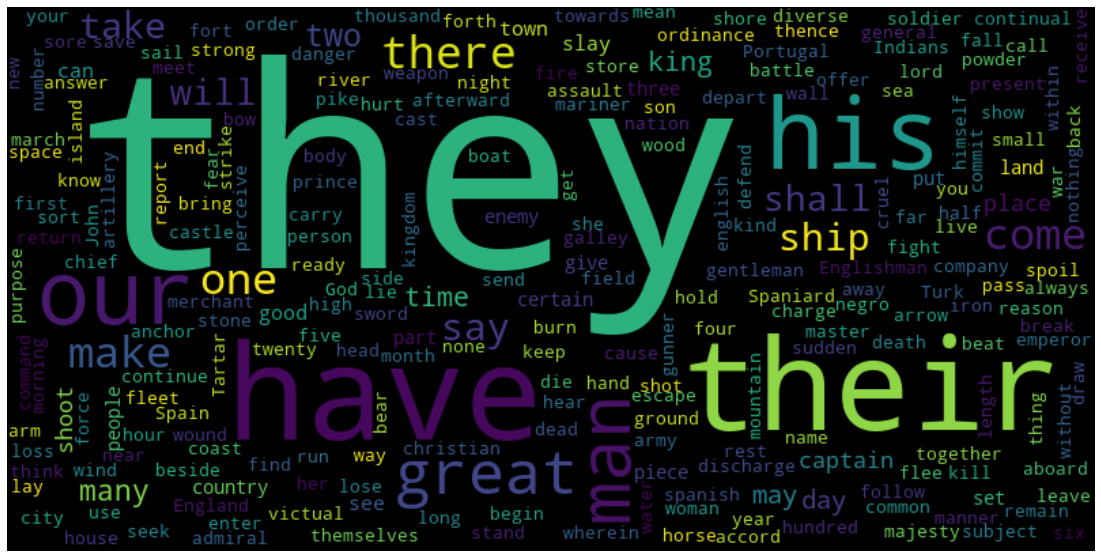

In [47]:
neighbors_wordcloud(hakluyt_lem, viol_flags, 5, stop_words_min , cloud_words = 250, include_targets = False)

The initial display is obscured by the outsize presence of uninformative word tokens. Following simple filtering, a clearer image emerges:

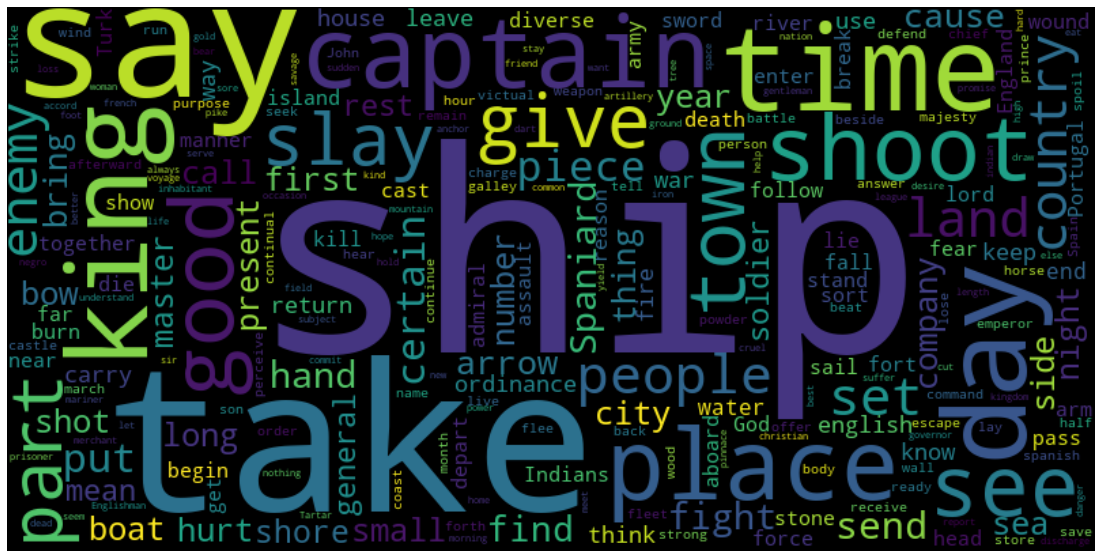

In [48]:
neighbors_wordcloud(hakluyt_lem, viol_flags, 5, stop_words_max + ['great','man', 'make','come'] , cloud_words = 250, include_targets = False)

In [50]:
#print(neighbors_fdist(hakluyt_lem, viol_flags, 5, stop_words_max + ['great','man', 'make','come'], include_targets = False).most_common(250))

Ships clearly provide the setting for much explicit violence in Hakluyt. Kings and captains are likely involved, directly or indirectly. 'Say' and 'time' may be simply spilling over from their overall high frequency.


"Take" makes a prominent appearance: it is not only an ambiguous term that may indicate various degrees of dispossession or captivity, but it is among the most consistent terms that come up near expressions of overt violence. 

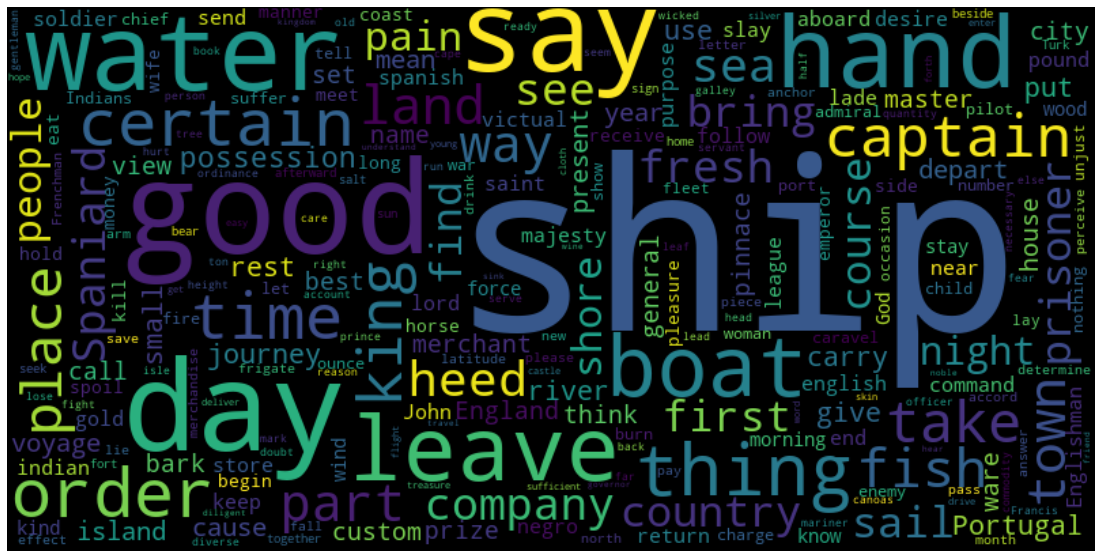

In [56]:
neighbors_wordcloud(hakluyt_lem, ['take'], 2, stop_words_max + ['great','man', 'make','come'] , cloud_words = 250, include_targets = False)